# **Smart Banking: Marketing Optimization for Term Deposits with Machine Learning**

**Created by Abdul Hadi**

**Introduction**: In today’s banking industry, customer deposits are vital for ensuring liquidity, funding loans, and supporting long-term financial growth. To increase term deposits, a bank plans to launch a telemarketing campaign targeting its existing customers. However, contacting all customers without filtering would be costly and inefficient. This capstone project, conducted during my studies at Purwadhika Digital Technology School, aims to help the bank run a more targeted and cost-effective campaign by developing a predictive model that identifies customers most likely to subscribe to a term deposit. Using data analysis and machine learning, the project seeks to reduce marketing costs, improve conversion rates, and support better strategic decisions.

Data Source: [Bank Marketing Campaign Analysis](https://drive.google.com/drive/folders/13lrEDlKfnTPNREfGLBaYGYf8dSjHBzfW?usp=drive_link) 

# **Business Understanding**

**Context :**

In the banking industry, deposits play a crucial role. A deposit is money placed by customers in a bank for a certain period, during which they receive a return (income) as compensation for lending their money. Banks rely on deposits as a source of funds to provide loans to other customers and to invest, generating higher returns for the bank itself. Additionally, banks need deposits to support their daily operations. Deposits also help banks maintain liquidity and financial stability. Through effective marketing campaigns, banks can encourage customers to actively participate in saving their money through various deposit products. The primary goal of such marketing efforts is to increase the total amount of deposits received by the bank, which in turn supports long-term financial growth and stability.

A bank in one city in Europe is planning to launch a telemarketing campaign aimed at encouraging customers to open term deposits. The campaign targets the bank’s existing customer base, which is fairly large.

**Problem Statement :**

Due to the large number of customers, the marketing campaign would require a significant amount of time and cost if the bank does not apply any filtering to determine which customers should be contacted. Without such filtering, the campaign might end up costing more than the profit generated from the term deposits secured from customers who agree to participate. Therefore, it is essential to make the campaign more efficient so that the bank can maximize the amount of deposits obtained while minimizing time and expenses.

**Goals :**

As Data Scientists, I aim to help the company reduce marketing costs by understanding the characteristics of customers who are likely to subscribe to a term deposit. This will allow for a more targeted and cost-effective campaign. To uncover these customer characteristics, the following questions will be addressed:

1. What are the characteristics of customers who agree to a term deposit?
(e.g., age, job type, presence of personal loans, and balance of customer's saving)

2. What kind of communication methods are effective for customers who eventually subscribe?
(e.g., communication channel and the last contact month)

3. How do customers who agree to a term deposit respond to the bank’s marketing efforts in the current and previous campaigns?
(e.g., number of contacts during this campaign, time since last contact in previous campaigns, number of previous contacts, and outcome of the previous campaign)

Based on these problems, we will develop a tool that can identify the characteristics of customers likely to subscribe to a term deposit, using the available features. This tool will allow the marketing team to focus only on the most promising customers, reducing costs while maximizing the conversion rate and avoiding the losses associated with poorly targeted campaigns.

All findings and the resulting model will be presented to stakeholders to support better decision-making and strategic planning for future campaigns.

Stakeholders:

- Marketing Manager
- Board of Directors (BoD)

**Analytic Approach :**

The first step is to analyze the available data to identify the characteristics of customers who are interested in subscribing to a term deposit. This will help determine which features actually influence a customer’s decision to make a term deposit. After that, a classification model will be built using machine learning based on the available features, with the goal of helping the company predict the probability that a customer will be interested in subscribing to a term deposit.

**Metric Evaluation :**

Since our main focus is on identifying customers who are genuinely interested in subscribing to a term deposit, we define the target variable as follows:

- 0: Did not subscribe to a term deposit  
- 1: Subscribed to a term deposit

Error Types and Their Business Implications

1. Type I Error (False Positive)  
- Definition: Predicting that a customer will subscribe, when in fact they will not.  
- Business Impact: This results in wasted marketing resources, such as time, effort, and cost, spent on contacting uninterested customers. Minimizing false positives is essential for improving campaign efficiency.

2. Type II Error (False Negative)  
- Definition: Predicting that a customer will not subscribe, when in fact they would have.  
- Business Impact: This leads to missed revenue opportunities, as the bank fails to reach potential customers who were actually interested in making a deposit.

**Evaluation Focus: Precision**

Since contacting uninterested customers generates cost, we prioritize precision as the primary evaluation metric.

- A high precision means that when the model predicts a customer will subscribe, that prediction is likely to be correct.
- This directly aligns with the business goal of minimizing unnecessary marketing expenses.

To connect model predictions to financial outcomes, we introduce a `Business Metric` that quantifies the reduction in marketing costs. Without the model, the bank would need to contact all potential customers, resulting in high expenditures. In contrast, the model enables the bank to target only the most likely subscribers, significantly lowering outreach costs.

This metric is calculated based on key assumptions, including:

- The cost per customer contact (e.g., phone call)
- The number of contacts avoided due to model-driven targeting

By incorporating this metric, we move beyond standard accuracy metrics and evaluate the real business value generated by the machine learning model.


# **Data Understanding and Cleaning**

**Attribute Information**

| Attribute | Data Type | Description |
|-----------|-----------|-------------|
| `age` | Integer | Age of the prospective customer |
| `job` | String | Job type of the customer |
| `balance` | Integer | Average yearly balance (in euros) of the customer's account |
| `housing` | String | Does the customer have a housing loan? (`yes` or `no`) |
| `loan` | String | Does the customer have a personal loan? (`yes` or `no`) |
| `contact` | String | Type of communication used in the current campaign (`cellular` or `telephone`) |
| `month` | String | Last contact month during the current campaign |
| `campaign` | Integer | Number of contacts during this campaign |
| `pdays` | Integer | Days since the customer was last contacted in a previous campaign (`-1` if never contacted) |
| `poutcome` | String | Outcome of the previous marketing campaign (`success`, `failure`, `unknown`, `other`) |
| `deposit` | String | Whether the client subscribed to a term deposit (`yes` or `no`) |


**Import Libraries**

In [1]:
# Library
import pandas as pd
import numpy as np
from IPython.display import display, Image

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from category_encoders import OrdinalEncoder


# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import f1_score, recall_score, fbeta_score, make_scorer

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# import property for handling imbalance
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# statistics
from scipy.stats import normaltest, mannwhitneyu, chi2_contingency

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

import lightgbm as lgb
from sklearn.svm import SVC

# Set max columns
pd.set_option('display.max_columns', None)

In [2]:
# %%capture
# !pip install jcopml
# !pip install category_encoders

In [3]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, PolynomialFeatures, PowerTransformer, StandardScaler, RobustScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from jcopml.tuning import random_search_params as rsp
from category_encoders import BinaryEncoder

**Load Dataset**

In [4]:
df = pd.read_csv('data_bank_marketing_campaign.csv')

# Display the first 5 rows
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


From the information above, we can see at a glance that the dataset contains 11 columns and 7,813 rows. The target column is deposit, and there appear to be no missing values in the dataset. However, based on references to the dataset, it is known that all missing values have been filled with the value 'unknown'.

In [6]:
display(round(df.describe()),df.describe(include=['object']))

,age,balance,campaign,pdays
count,7813.0,7813.0,7813.0,7813.0
mean,41.0,1512.0,3.0,51.0
std,12.0,3089.0,3.0,108.0
min,18.0,-6847.0,1.0,-1.0
25%,32.0,127.0,1.0,-1.0
50%,39.0,549.0,2.0,-1.0
75%,49.0,1684.0,3.0,40.0
max,95.0,66653.0,63.0,854.0


,job,housing,loan,contact,month,poutcome,deposit
count,7813,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4,2
top,management,no,no,cellular,may,unknown,no
freq,1792,4140,6789,5628,1976,5819,4081


**Insight :**

1. Most customers in the dataset did not participate in the previous campaign, indicated by the high frequency of pdays = -1.
2. The youngest client in the dataset is 18 years old, and the oldest is 95.
3. The average yearly account balance of clients is €1,512, but it has a wide range — from –€6,847 (indicating possible debt or overdraft) to €66,653, showing significant financial diversity among clients.
4. The dataset sample includes 7,813 records (not the full 41,188 from the original dataset).
5. The most common job is "management", appearing in 1,792 records (~22.9% of the data).
6. Most clients do not have a housing loan, shown by 4,140 records marked "no" (~53%).
7. Most clients do not have a personal loan, with 6,789 entries marked "no" (~86.9%).
8. The most common contact method is "cellular", used in 5,628 contacts (~72%).
9. The most frequent month of contact is May, with 1,976 contacts (~25.3%).
10. The most common outcome of the previous campaign is "unknown", found in 5,819 entries (~74.5%), indicating limited prior engagement.
11. The majority of customers did not subscribe to a term deposit, with 4,081 out of 7,813 records marked "no" (~52.3%).

**Check Unique Values, Missing Values, and Duplicates**

**Check Unique Values**

In [7]:
listItem = []
for col in df.columns :
 
    listItem.append( [col, df[col].nunique(), df[col].unique()   ])

unique_values = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
pd.set_option('max_colwidth', None)
unique_values

,Column Name,Number of Unique,Unique Sample
0,age,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 31, 53, 30, 46, 48, 25, 29, 28, 52, 49, 44, 42, 27, 47, 64, 26, 34, 56, 32, 58, 45, 54, 50, 79, 65, 40, 24, 60, 43, 61, 59, 62, 68, 82, 71, 73, 76, 69, 20, 72, 22, 67, 19, 70, 75, 63, 93, 77, 80, 66, 21, 87, 81, 92, 88, 84, 83, 78, 74, 18, 85, 95, 86, 90]"
1,job,12,"[admin., self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed, unknown]"
2,balance,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, 805, 0, 1234, 1107, 1170, 341, 4808, 88, 169, 863, 242, 2597, 4929, 277, 1438, 15, 3733, 204, 1684, 1025, 55, 19, 348, 785, 742, 511, 6651, 1612, 555, 54, 1185, 110, 950, 412, 228, 367, 3993, 2599, 3528, 32, 551, 3161, 533, 8725, 349, 514, 2688, -194, 154, 874, 2, 5953, 1269, -327, 235, 7, 2661, 1948, 20, 502, 193, 13658, 1716, 172, 1667, 157, 8, 951, 427, 241, 469, 2060, 7177, 655, -114, 588, -971, 4570, 250, 131, 93, 22, 15341, 356, 190, -124, 2228, -60, 376, 1567, 855, 4151, ...]"
3,housing,2,"[no, yes]"
4,loan,2,"[no, yes]"
5,contact,3,"[cellular, telephone, unknown]"
6,month,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, jul, oct, dec]"
7,campaign,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28, 63, 12, 24, 17, 15, 18, 19, 13, 21, 23, 22, 33, 16, 25, 26, 20, 29, 43]"
8,pdays,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412, 89, 114, 276, 93, 175, 57, 323, 156, 86, 95, 271, 182, 289, 334, 269, 309, 144, 183, 417, 138, 254, 337, 171, 389, 87, 170, 165, 372, 247, 98, 196, 469, 272, 104, 63, 587, 336, 145, 130, 28, 202, 324, 147, 94, 328, 420, 179, 90, 81, 160, 298, 356, 357, 267, 430, 52, 181, 365, 237, 330, 103, 374, 75, 133, 321, 204, 782, 266, 197, 270, 318, 349, 187, 359, 490, 192, 227, 100, 168, 177, 251, 301, 350, 92, 184, 345, 290, 199, 333, 169, ...]"
9,poutcome,4,"[unknown, other, failure, success]"


**Insight**

- There are "unknown" values in columns such as job, marital, education, default, housing, and loan, which indicate missing values encoded as categorical labels.
- The month column only contains data from March to December; this suggests that the bank did not conduct campaigns in January and February.
- The previous column (not shown above) likely contains values ranging only from 0 to 7, whereas the campaign column has a wider range of 1 to 43. This suggests that previous campaigns were limited in contact attempts, while the current campaign shows higher intensity.

**Missing Value**

In [8]:
df.isna().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

No missing values were detected because all missing values in the dataset were converted into 'unknown'. At this stage, no treatment will be applied to the missing values so they can still be analyzed during the Exploratory Data Analysis (EDA) phase. The treatment will be applied later during the pre-processing stage for machine learning.

**Duplicated Data**

In [9]:
df.duplicated().sum()

8

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

All duplicate data has now been removed to ensure the analysis remains unbiased.

**Data Preparation for Analysis and Feature Engineering**

**Age Grouping Column**

To simplify visual analysis, we will group ages into ranges with 10-year intervals.

In [12]:
def age_segment(age):
    if age < 18:
        return '<18'
    elif 18 <= age <= 24:
        return '18-24 (Young Adults)'
    elif 25 <= age <= 34:
        return '25-34 (Emerging Affluents)'
    elif 35 <= age <= 44:
        return '35-44 (Established Adults)'
    elif 45 <= age <= 54:
        return '45-54 (Mid-life Professionals)'
    elif 55 <= age <= 64:
        return '55-64 (Pre-retirement)'
    else:
        return '65+ (Seniors)'


In [13]:
df.insert(1, 'Age_Range', df['age'].apply(age_segment))

Now, an Age_Range column has been created, which will help us analyze customer characteristics later on.

**Positive and Negative Balance Column**

A new column balance_desc that classifies whether the balance value is positive or negative

In [14]:
# Create a new column called balance_desc
df['balance_desc'] = df['balance'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')

# **Exploratory Data Analysis**

**EDA: Data Distribution and Correlation in the Dataset**

**Visualization of Numerical Data Distribution**

In [15]:
numerical_features = df.describe().columns

<Figure size 2000x1500 with 0 Axes>

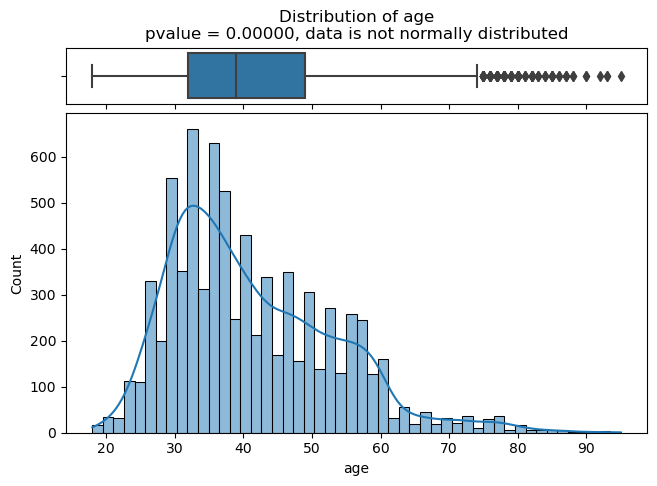

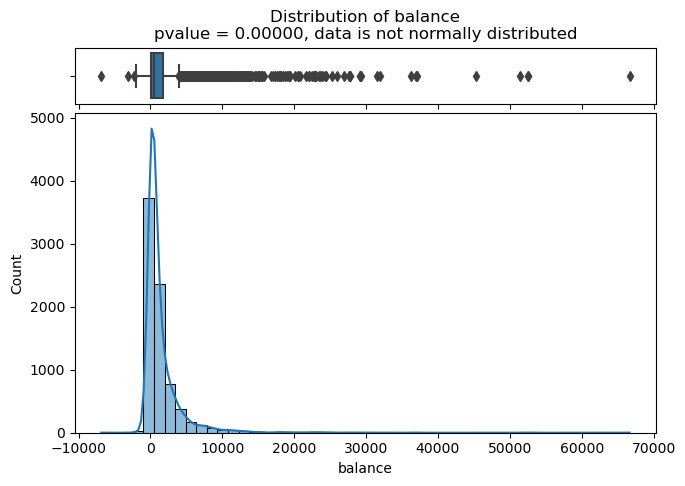

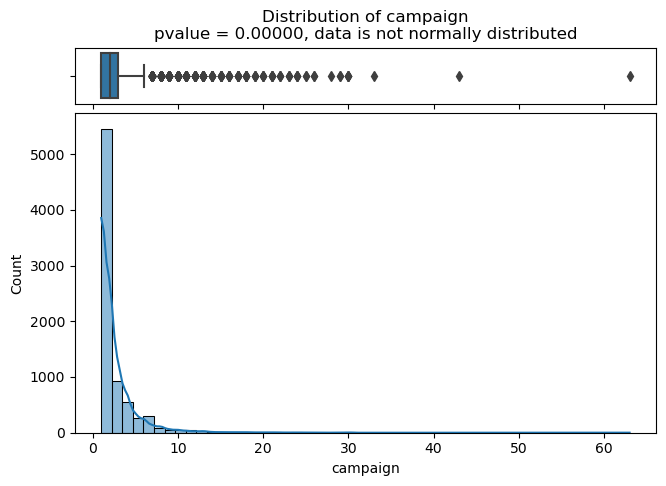

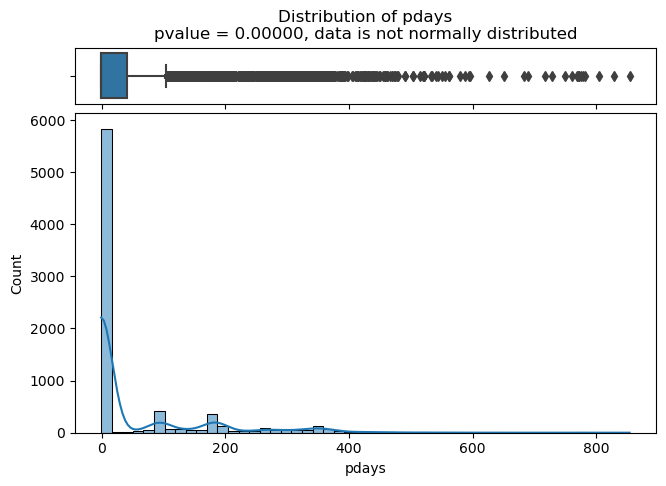

In [16]:
# Plot distribusi data numerikal pada dataset, beserta uji hipotesa dengan menggunakan normaltest
plt.figure(figsize=(20,15))
for kolom in numerical_features:

    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), 
                                    gridspec_kw={"height_ratios": (.15, .85),
                                                "hspace": 0.05})

    stat, pvalue = normaltest(df[kolom].dropna())

    if pvalue > 0.05 :
        distribusi = f'pvalue = {pvalue:.5f}, data is normally distributed'
    else :
        distribusi = f'pvalue = {pvalue:.5f}, data is not normally distributed'

    ax1.set_title(f"Distribution of {kolom}\n{distribusi}", color = "black")
    sns.boxplot(x = df[kolom], ax = ax1)
    ax1.set(xlabel = "")

    sns.histplot(data = df[kolom], ax = ax2, stat = "count", kde=True, bins=50)

    plt.show()

**Insight**

- None of the data is normally distributed.
- The majority of contacted individuals are in the 30–40 age range.
- Most contact durations are under 1000 seconds (approximately less than 15 minutes).
- In terms of the campaign variable, most customers were contacted fewer than 10 times.
- For pdays (days since last contact in a previous campaign), nearly 90% of customers were not contacted during the previous campaign.
- A similar conclusion applies to previous, where around 90% of customers had 0 previous contacts, indicating they were not reached in the earlier campaign.

In [17]:
categorical_features = df.describe(include='object').columns

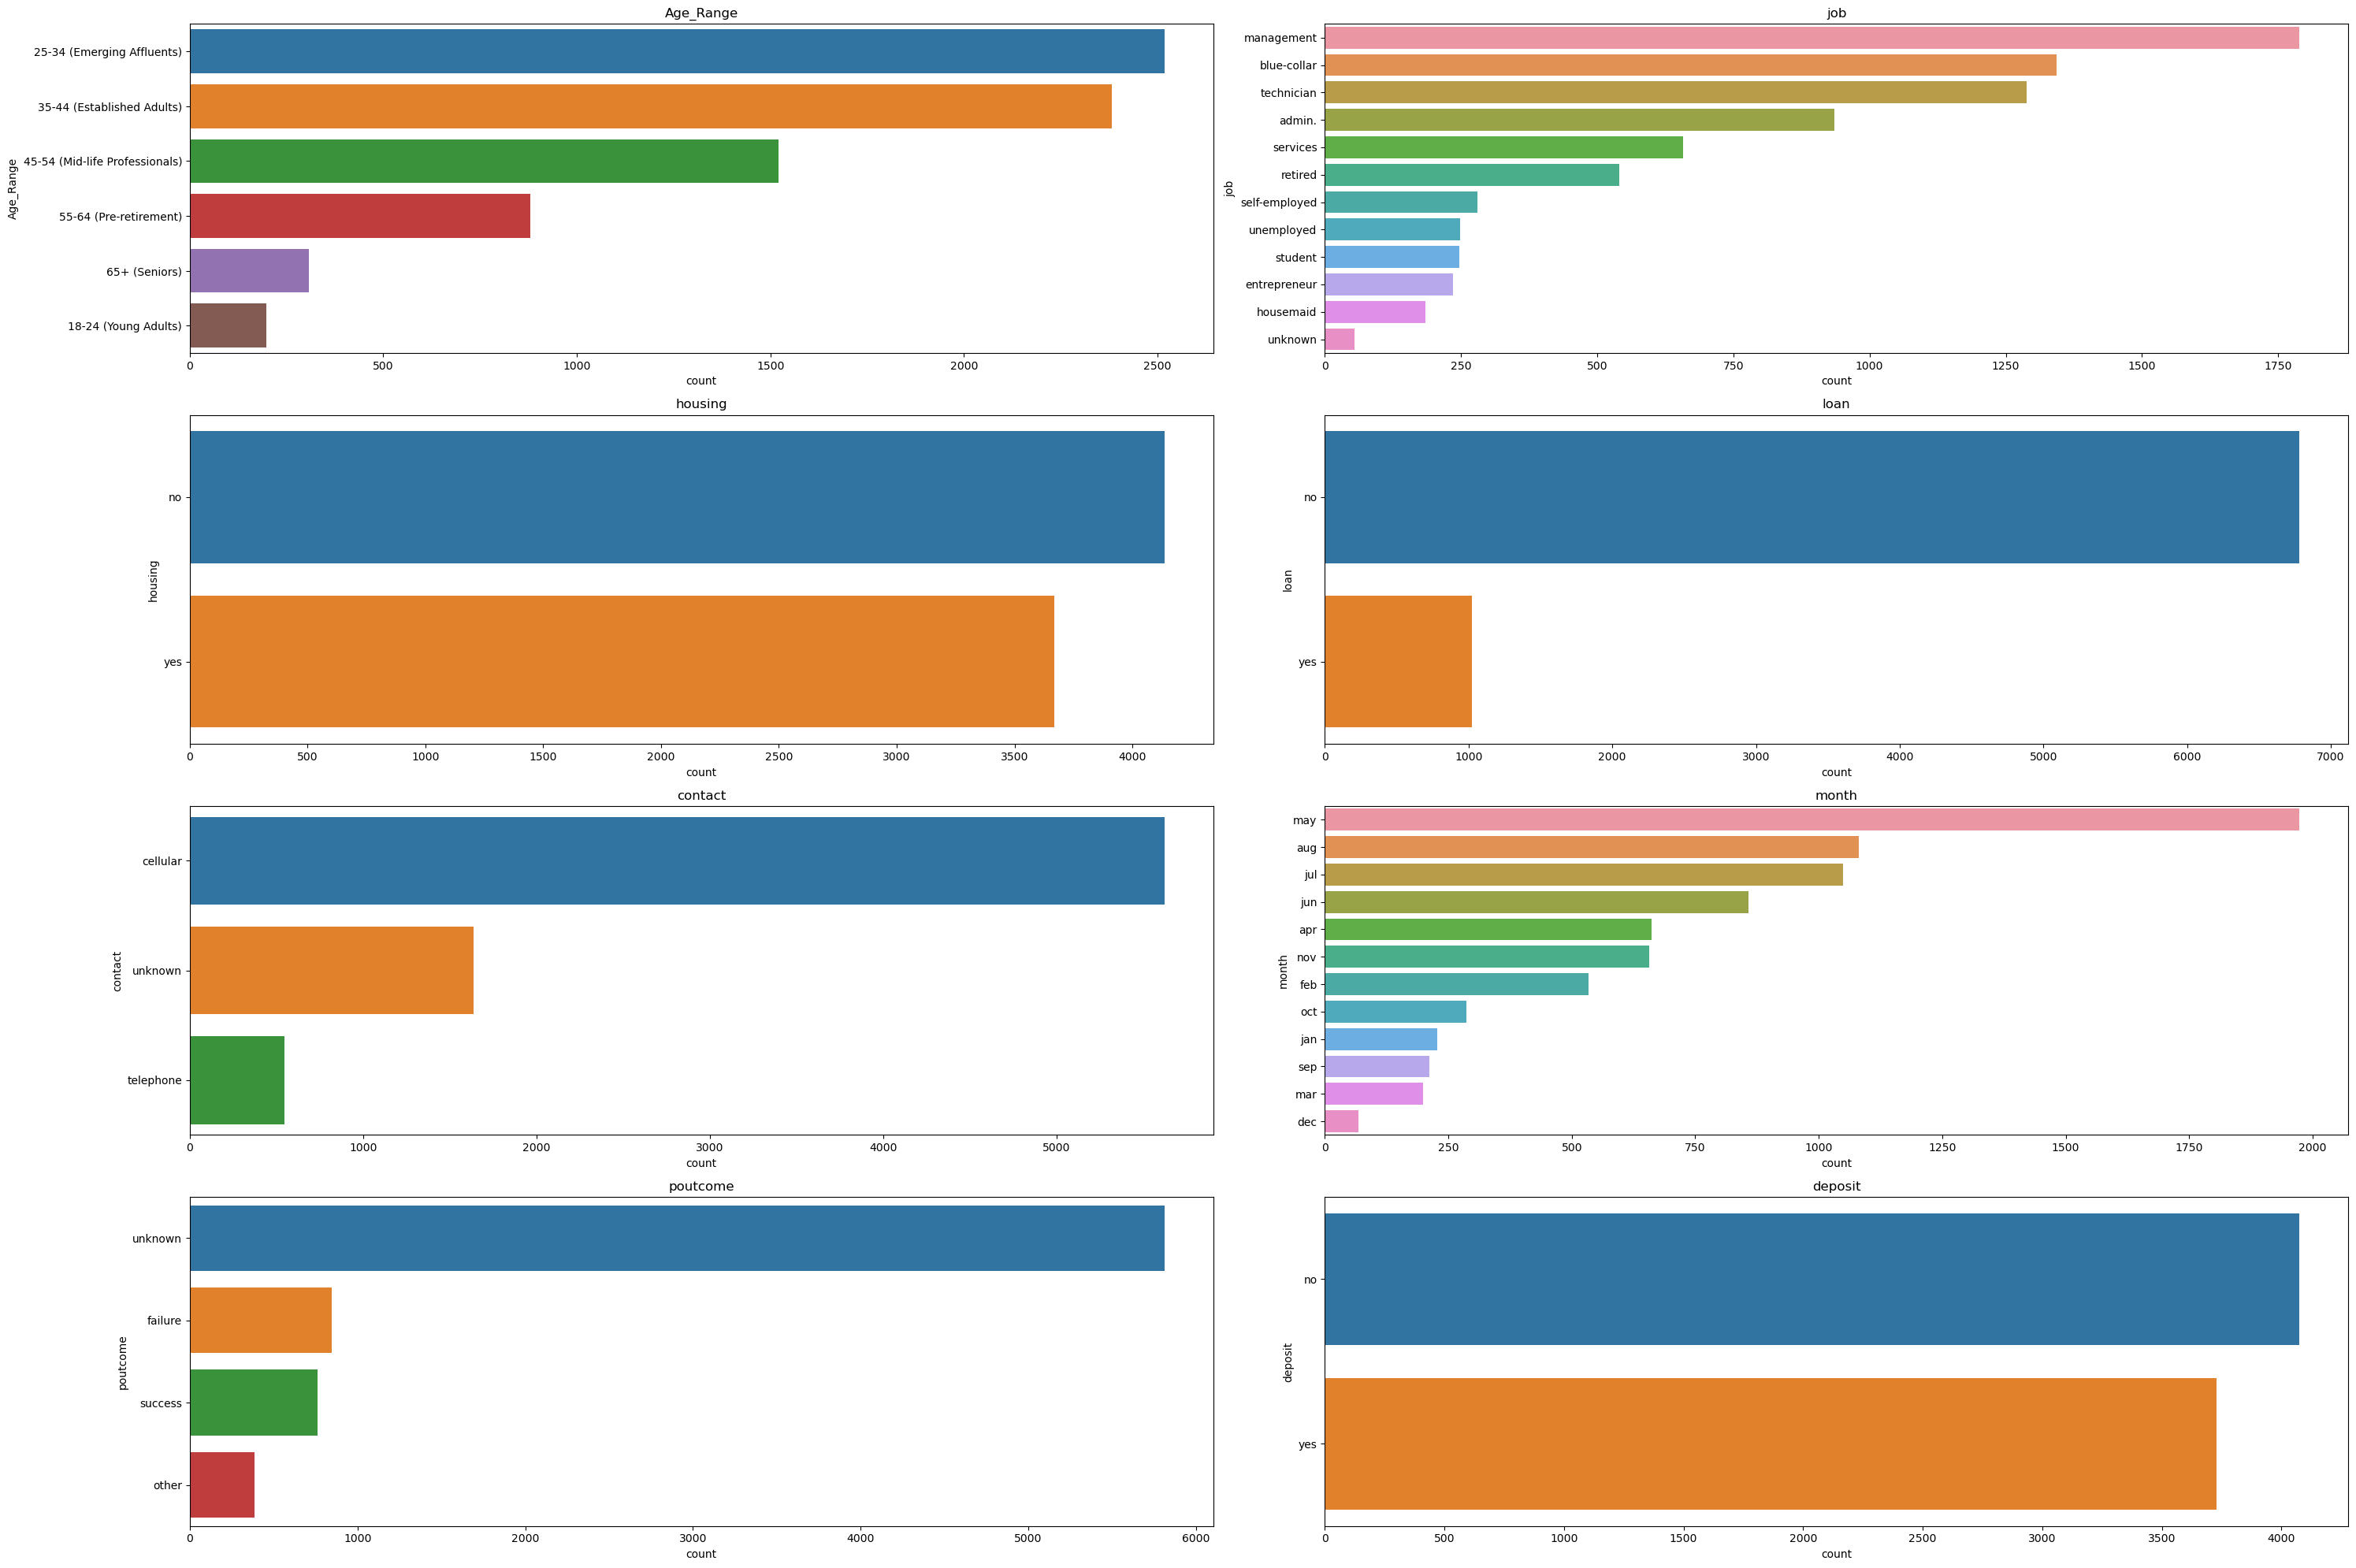

In [18]:
fig, axes = plt.subplots(4, 2, figsize=(30, 20)) 
for i, j in zip(categorical_features, axes.flatten()):
    ax = sns.countplot(data=df, y= i, ax= j, order=df[i].value_counts().index)
    ax.set_title(f'{i}',size = 12) 
plt.tight_layout()
plt.show()

**Insights** 

- The majority of clients contacted fall within the 25–35 and 36–45 age ranges. These are considered productive working ages, making them a logical target group for bank marketing efforts. In contrast, fewer contacts were made with clients aged 17–25 and over 65, likely due to lower income or financial activity.
- In terms of occupation, the most frequently contacted clients work in management, followed by blue-collar, technician, and admin roles. This suggests a broad targeting strategy, covering both white-collar and blue-collar professions.
- Most clients in the dataset do not have a housing loan, although the number of clients who do have housing loans is also substantial, indicating a balanced segment.
- Regarding personal loans, the vast majority of clients have not taken one. The ratio appears to be approximately 6:1, suggesting that the bank may prefer offering term deposits to clients with lower financial liabilities.
- The contact method used most often is cellular phone, making up a clear majority. Telephone and unknown are used far less frequently. This is likely due to the increasing reliance on mobile communication over landlines.
- The month with the highest number of contacts is May, standing out significantly from all other months. This likely indicates a major campaign push during that period.
- The outcome of the previous campaign (poutcome) shows that the majority of clients had an unknown status, which means they likely were not part of previous campaigns. This is followed by small portions marked as failure, success, and other.
- In terms of campaign success, the number of clients who subscribed to a term deposit (deposit = yes) is significantly lower than those who did not. The ratio appears to be around 1:6, indicating a relatively low conversion rate.

**Correlation Visualization on the Dataset**

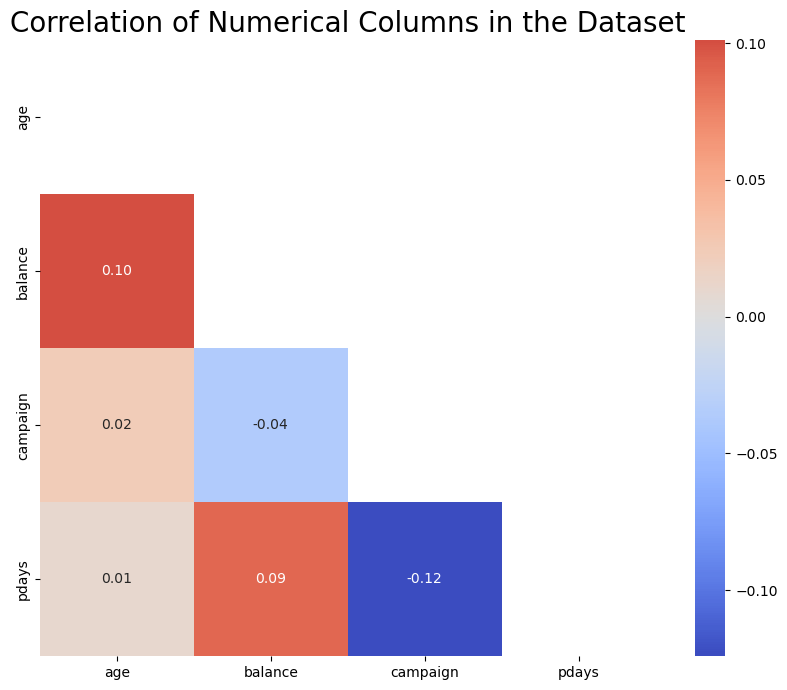

In [19]:
plt.figure(figsize=(10,8))

matrix = np.triu(df[numerical_features].corr(method='spearman'))

sns.heatmap(data=df[numerical_features].corr(method='spearman'), annot=True, fmt='.2f', cmap='coolwarm', center=0, mask = matrix, square='True')
plt.title('Correlation of Numerical Columns in the Dataset',size=20)
plt.show()

**Insight**

In the current heatmap, none of the displayed variables — age, balance, campaign, and pdays — show correlations that meet or exceed this threshold.

**EDA: Feature vs Target Visualization in the Dataset**

In this analysis, we aim to address the key questions outlined above:

1. What are the personal characteristics of clients who accept a term deposit?
This includes factors such as age, marital status, education, occupation, whether they have a personal loan, a housing loan, or a history of default.

2. What type of clients agree to term deposits based on the communication method used?
We will examine how clients were contacted (e.g., phone type), the month and day of the last contact, and the duration of the last call before they made a decision.

3. What are the behavioral characteristics of clients who accepted the term deposit in relation to current and previous campaign efforts?
This includes the number of contacts made in the current campaign, how recently the client was contacted during a previous campaign (pdays), how many times they were contacted before (previous), and the outcome of the previous campaign.

**Customer Personal Information Analysis**

**Analysis of Age and Age Range Columns**

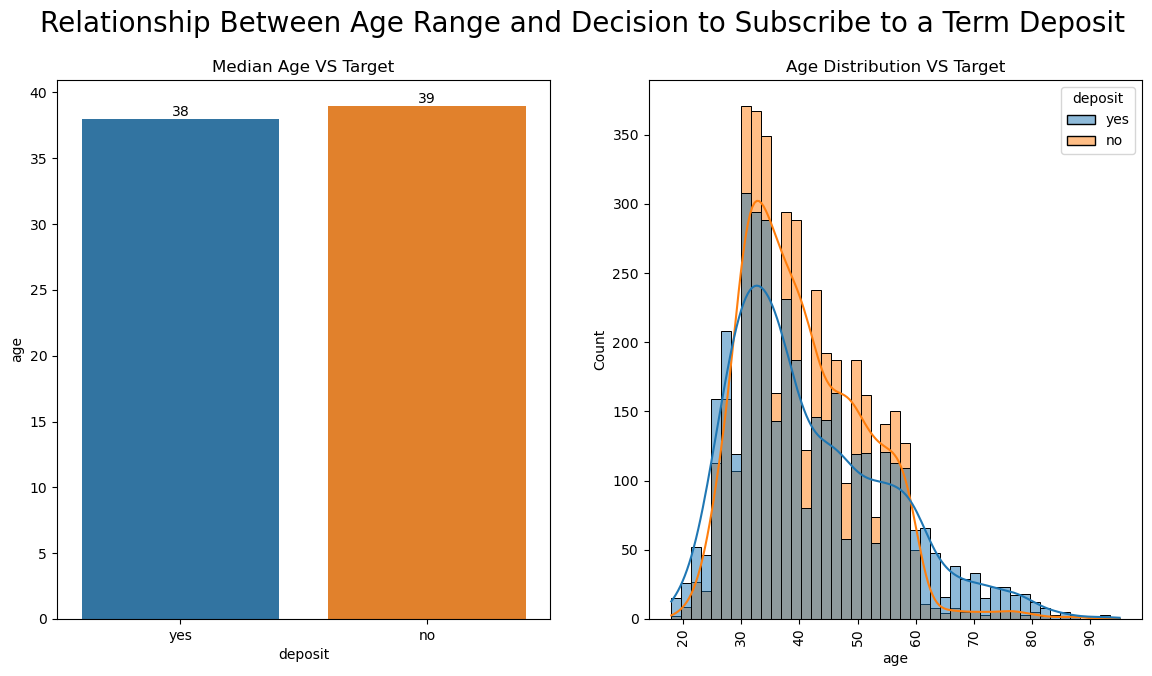

In [20]:
# Visualisasi sebaran data terhadap target serta conversion rate
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(14,7))

plt.suptitle('Relationship Between Age Range and Decision to Subscribe to a Term Deposit', size = 20)

axes[0].set_title('Median Age VS Target')
plot1=sns.barplot(x = 'deposit', y = 'age', data = df, estimator=np.median, ci=0, ax=axes[0])
plot1.bar_label(plot1.containers[0],label_type='edge')

axes[1].set_title('Age Distribution VS Target')
plot2=sns.histplot(data = df, hue = 'deposit', x = df['age'], stat = 'count',ax=axes[1], kde = True)
plt.xticks(rotation=90)

plt.show()

Based on the visual inspection, it is difficult to see a significant difference between the median age of people who made a term deposit and those who did not. Therefore, we will use the Mann-Whitney hypothesis test to see whether the medians are significantly different or not.

Hypotheses:

- H₀ (Null Hypothesis): The age distribution of the 'Yes' group is equal to the age distribution of the 'No' group.
- H₁ (Alternative Hypothesis): The age distribution of the 'Yes' group is not equal to the age distribution of the 'No' group.

In [21]:
stat, pvalue = mannwhitneyu(
    df[df['deposit'] == 'yes']['age'],
    df[df['deposit'] == 'no']['age'],
    alternative = 'two-sided'
)
pvalue

0.959237383741824

In [22]:
# Conclusion:
if pvalue > 0.05:
    print(f'''
          p-value = {pvalue:.5f}. p-value > 0.05. Failed to reject H₀.
          We do not have enough evidence to say that the age distribution of people who agreed to a term deposit 
          is different from the age distribution of people who declined to make a term deposit.
          (The distributions are not significantly different.)
          ''')
else:
    print(f'''
          p-value = {pvalue:.5f}. p-value <= 0.05. Successfully rejected H₀.
          We have enough evidence to say that the age distribution of people who agreed to a term deposit 
          is different from the age distribution of people who declined to make a term deposit.
          (The distributions are significantly different.)
          ''')


          p-value = 0.95924. p-value > 0.05. Failed to reject H₀.
          We do not have enough evidence to say that the age distribution of people who agreed to a term deposit 
          is different from the age distribution of people who declined to make a term deposit.
          (The distributions are not significantly different.)
          


**Insight:**

The results suggest that age does not significantly influence a person's likelihood of accepting a term deposit.

To gain a clearer understanding, we will visualize the relationship between age range and the target variable, along with the conversion rate for each age group.

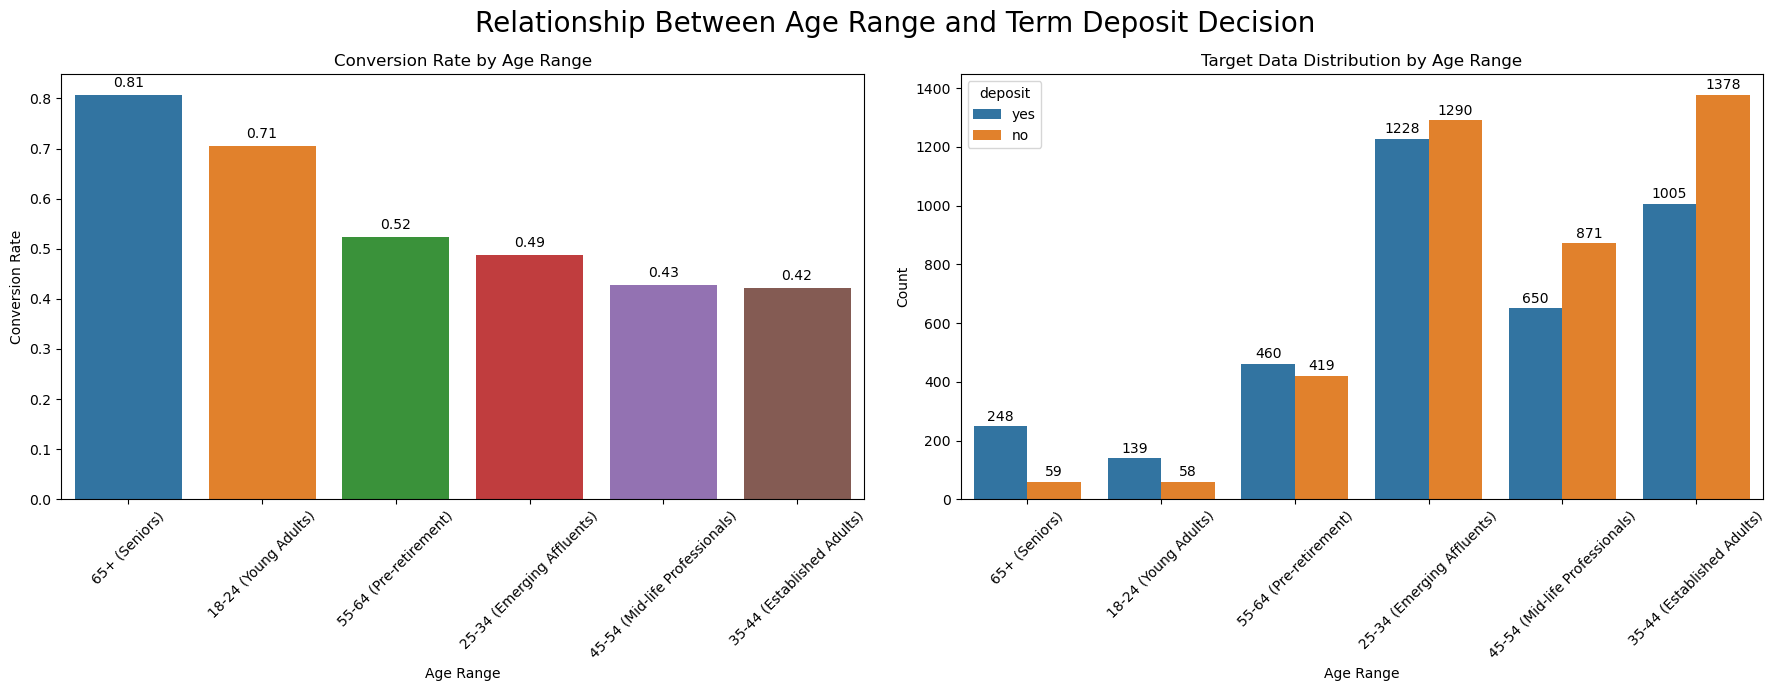

In [23]:
# Visualization of data distribution by target and conversion rate
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

plt.suptitle('Relationship Between Age Range and Term Deposit Decision', size=20)

# Calculate conversion rate
dfratio = df[['Age_Range', 'age']].groupby(['Age_Range'], as_index=False).count()
dfratio['deposit'] = df[df['deposit'] == 'yes'][['Age_Range', 'age']].groupby(['Age_Range']).count().values
dfratio['ratio'] = dfratio['deposit'] / dfratio['age']
dfratio = dfratio.sort_values('ratio', ascending=False)

# Barplot (Conversion Rate by Age Range)
plot2 = sns.barplot(
    data=dfratio,
    x='Age_Range',
    y='ratio',
    order=dfratio['Age_Range'],
    ax=axes[0]
)
axes[0].set_title('Conversion Rate by Age Range')
axes[0].set_xlabel('Age Range')
axes[0].set_ylabel('Conversion Rate')
axes[0].tick_params(axis='x', rotation=45)

# Add value labels on top of each bar
for bar in plot2.patches:
    height = bar.get_height()
    plot2.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,
        f'{height:.2f}',
        ha='center',
        va='bottom'
    )

# Countplot (Target Distribution by Age Range)
plot1 = sns.countplot(
    hue='deposit',
    x='Age_Range',
    data=df,
    order=dfratio['Age_Range'],
    ax=axes[1]
)
axes[1].set_title('Target Data Distribution by Age Range')
axes[1].set_xlabel('Age Range')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Add value labels on top of each bar (grouped bars)
for container in plot1.containers:
    plot1.bar_label(container, fmt='%d', label_type='edge', padding=2)

plt.tight_layout()
plt.show()


**Insight:**

Although most of the customers contacted fall within the productive age range (25–65 years old), the conversion rate is actually higher among those outside the productive age range — specifically, young adults (18–24) and seniors (65+).

This suggests that younger individuals who may not yet be fully employed, and seniors who are past their peak earning years, are more likely to accept term deposit offers compared to those in the middle of their careers.

As a recommendation, the bank could consider increasing outreach to these age groups (18–24 and 65+) to potentially raise the number of customers who agree to open term deposits.

In terms of marketing, messages could be tailored to:

- Emphasize the importance of saving early for young adults, even before entering the workforce
- Highlight the value of saving for future generations (e.g., children or grandchildren) for seniors

This targeted approach could help improve conversion rates within these high-performing age segments.

**Analysis of Loan vs Target Variable**

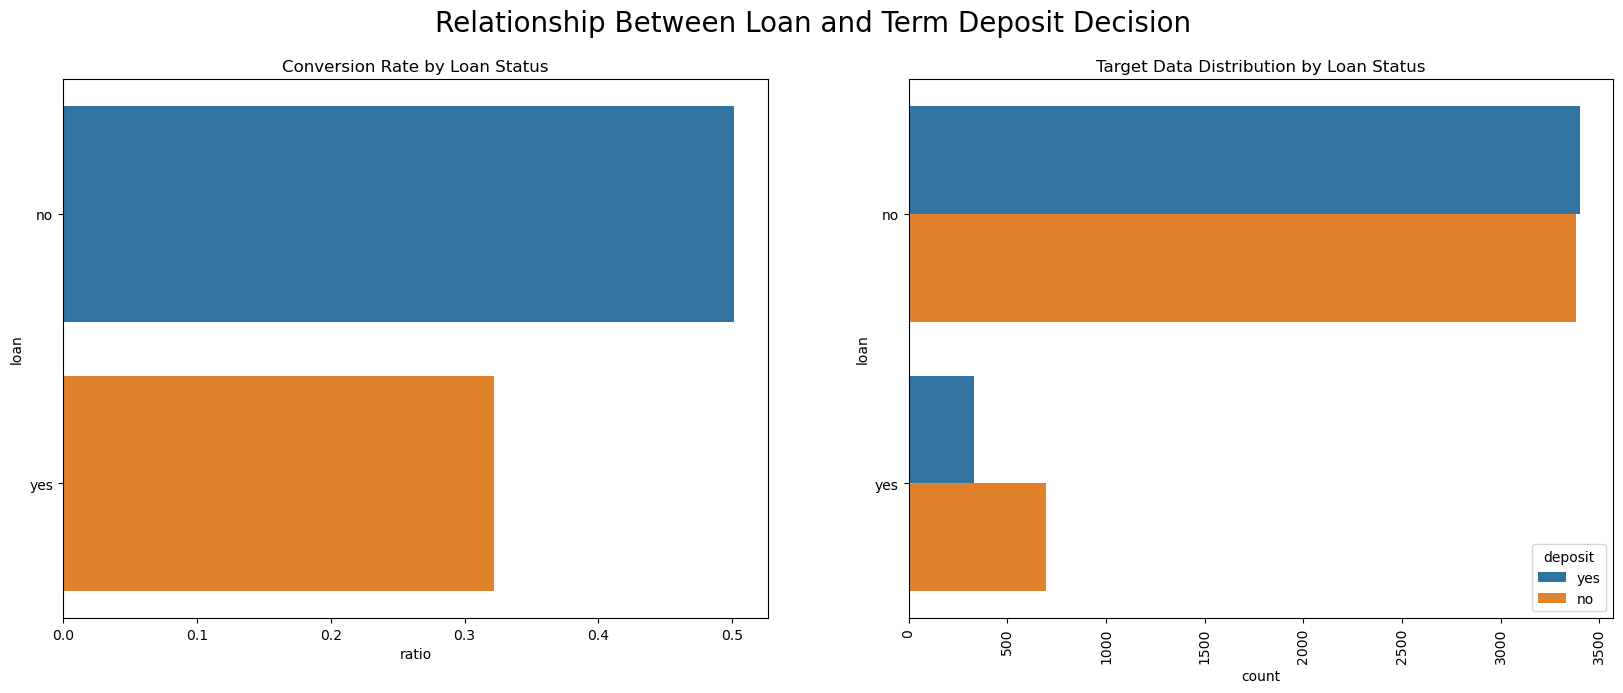

In [24]:
# Visualization of data distribution by target and conversion rate
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

plt.suptitle('Relationship Between Loan and Term Deposit Decision', size=20)

# Calculate conversion rate by loan status
dfratio = df[['loan', 'age']].groupby(['loan'], as_index=False).count()
dfratio['deposit'] = df[df['deposit'] == 'yes'][['loan', 'age']].groupby(['loan']).count().values
dfratio['ratio'] = dfratio['deposit'] / dfratio['age']
dfratio.sort_values('ratio', ascending=False)

# Barplot of conversion rate by loan status
plot2 = sns.barplot(
    data=dfratio,
    y='loan',
    x='ratio',
    order=dfratio.sort_values(by='ratio', ascending=False)['loan'],
    ax=axes[0]
)
axes[0].set_title('Conversion Rate by Loan Status')
plt.xlabel('Ratio yes/total')

# Countplot of target distribution by loan status
axes[1].set_title('Target Data Distribution by Loan Status')
plot1 = sns.countplot(
    hue='deposit',
    y='loan',
    data=df,
    order=dfratio.sort_values(by='ratio', ascending=False)['loan'],
    ax=axes[1]
)
plt.xticks(rotation=90)

plt.show()

**Insight:**

From the charts above, the conversion rate seems to show a significant difference between customers who have loans and those who don’t. However, we can observe that individuals without a loan tend to have a slightly higher conversion rate for term deposits compared to those with loans.

To determine whether this observed difference is statistically significant, we will proceed with a Chi-Square hypothesis test to examine the relationship between loan status and the likelihood of accepting a term deposit.

In [25]:
df_loan = df[['loan','deposit']]
df_loan['yes'] = df_loan['deposit'].apply(lambda x : 1 if x == 'yes' else 0)
df_loan['no'] = df_loan['deposit'].apply(lambda x : 1 if x == 'no' else 0)
df_loan = df_loan.drop(columns = 'deposit')
df_loan_chi = df_loan.groupby('loan').sum()
df_loan_chi

,yes,no
loan,,
no,3400,3381
yes,330,694


Hypotheses:

- H₀ (Null Hypothesis): There is no association between having a loan and a customer's likelihood of making a term deposit.
- H₁ (Alternative Hypothesis): There is an association between having a loan and a customer's likelihood of making a term deposit.

In [26]:
# conclusion:
if pvalue > 0.05:
    print(f'''
          p-value = {pvalue:.5f}. p-value > 0.05. Failed to reject H₀.
          We do not have enough evidence to say that there is an association between loan status and the target variable (they are independent).
          (The proportions are not significantly different.)
          ''')
else:
    print(f'''
          p-value = {pvalue:.5f}. p-value <= 0.05. Successfully rejected H₀.
          We have sufficient evidence to say that there is an association between loan status and the target variable (they are dependent).
          (The proportions are significantly different.)
          ''')


          p-value = 0.95924. p-value > 0.05. Failed to reject H₀.
          We do not have enough evidence to say that there is an association between loan status and the target variable (they are independent).
          (The proportions are not significantly different.)
          


**Insight:**

The analysis indicates a statistically significant association between customers' loan status and their likelihood of subscribing to a term deposit. This conclusion is supported by a p-value of 0.001, which falls well below the conventional alpha level of 0.05, thereby leading to the rejection of the null hypothesis. The result suggests that the variables are not independent and that loan status may influence customer decisions regarding term deposits.

Although financial theory might suggest that individuals with loans would be less inclined to commit to fixed savings—possibly due to existing financial obligations—the data reveals notable behavioral differences between customers with and without loans, implying that loan status could be a relevant factor in marketing or predictive modeling efforts.

**Analysis of Housing vs Target Variable**

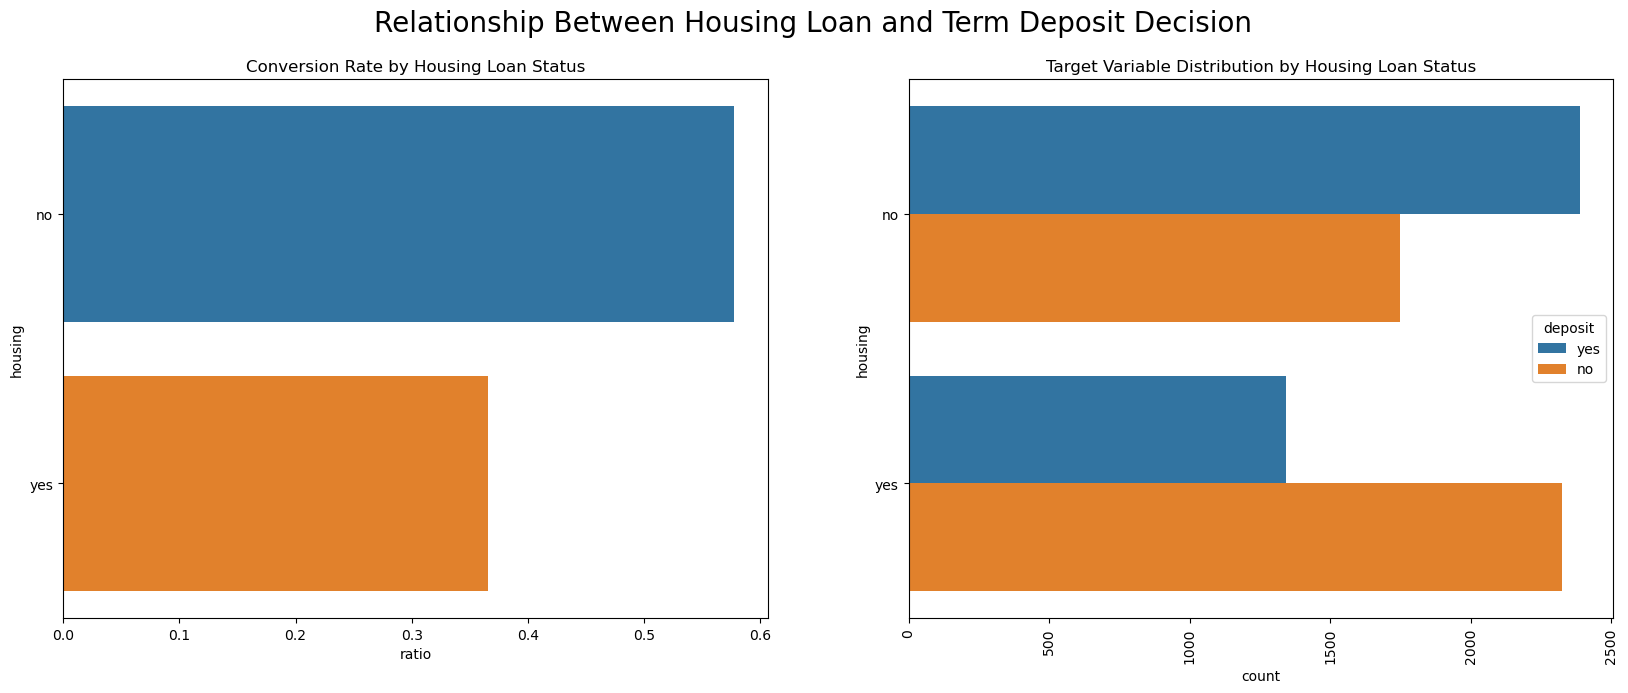

In [27]:
# Visualization of data distribution by target and conversion rate
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

plt.suptitle('Relationship Between Housing Loan and Term Deposit Decision', size=20)

# Calculate conversion rate by housing loan status
dfratio = df[['housing', 'age']].groupby(['housing'], as_index=False).count()
dfratio['deposit'] = df[df['deposit'] == 'yes'][['housing', 'age']].groupby(['housing']).count().values
dfratio['ratio'] = dfratio['deposit'] / dfratio['age']
dfratio.sort_values('ratio', ascending=False)

# Barplot of conversion rate by housing status
plot2 = sns.barplot(
    data=dfratio,
    y='housing',
    x='ratio',
    order=dfratio.sort_values(by='ratio', ascending=False)['housing'],
    ax=axes[0]
)
axes[0].set_title('Conversion Rate by Housing Loan Status')
plt.xlabel('Ratio yes/total')

# Countplot of target distribution by housing status
axes[1].set_title('Target Variable Distribution by Housing Loan Status')
plot1 = sns.countplot(
    hue='deposit',
    y='housing',
    data=df,
    order=dfratio.sort_values(by='ratio', ascending=False)['housing'],
    ax=axes[1]
)
plt.xticks(rotation=90)

plt.show()


**Insight:**

Based on the chart above, the conversion rate visualization suggests that there is a noticeable difference between groups. Specifically, individuals without a housing loan tend to have a higher conversion rate for term deposits compared to those who have one.

To determine whether this difference is statistically significant, a Chi-Square hypothesis test will be conducted to examine the relationship between housing loan status and the likelihood of accepting a term deposit.

Hypotheses:

- H₀ (Null Hypothesis): There is no association between having a housing loan and a customer's likelihood of subscribing to a term deposit.
- H₁ (Alternative Hypothesis): There is an association between having a housing loan and a customer's likelihood of subscribing to a term deposit.

In [28]:
df_housing = df[['housing','deposit']]
df_housing['yes'] = df_housing['deposit'].apply(lambda x : 1 if x == 'yes' else 0)
df_housing['no'] = df_housing['deposit'].apply(lambda x : 1 if x == 'no' else 0)
df_housing = df_housing.drop(columns = 'deposit')
df_housing_chi = df_housing.groupby('housing').sum()
df_housing_chi

,yes,no
housing,,
no,2388,1748
yes,1342,2327


In [29]:
# Conclusion:
if pvalue > 0.05:
    print(f'''
          p-value = {pvalue:.5f}. p-value > 0.05. Failed to reject H₀.
          We do not have sufficient evidence to suggest that there is an association between housing loan status and the target variable (they are independent).
          (The proportions are not significantly different.)
          ''')
else:
    print(f'''
          p-value = {pvalue:.5f}. p-value <= 0.05. Successfully rejected H₀.
          We have sufficient evidence to suggest that there is an association between housing loan status and the target variable (they are dependent).
          (The proportions are significantly different.)
          ''')


          p-value = 0.95924. p-value > 0.05. Failed to reject H₀.
          We do not have sufficient evidence to suggest that there is an association between housing loan status and the target variable (they are independent).
          (The proportions are not significantly different.)
          


**Insight :**

The data shows a significant association between housing loan status and a customer's likelihood of subscribing to a term deposit. This is supported by a very small p-value (p-value = 0.001), indicating that the two variables are statistically dependent and that their proportions differ significantly.

From a domain knowledge perspective, this relationship is reasonable. Customers with an ongoing housing loan are likely to prioritize repaying their installments and may be less inclined to place their money into fixed-term deposits, as they are already committed to substantial monthly payments. This insight can be useful for tailoring financial product offerings based on customers’ loan obligations.

**Analysis of Interaction during Campaign**

**Analysis of Contact vs Target Variable**

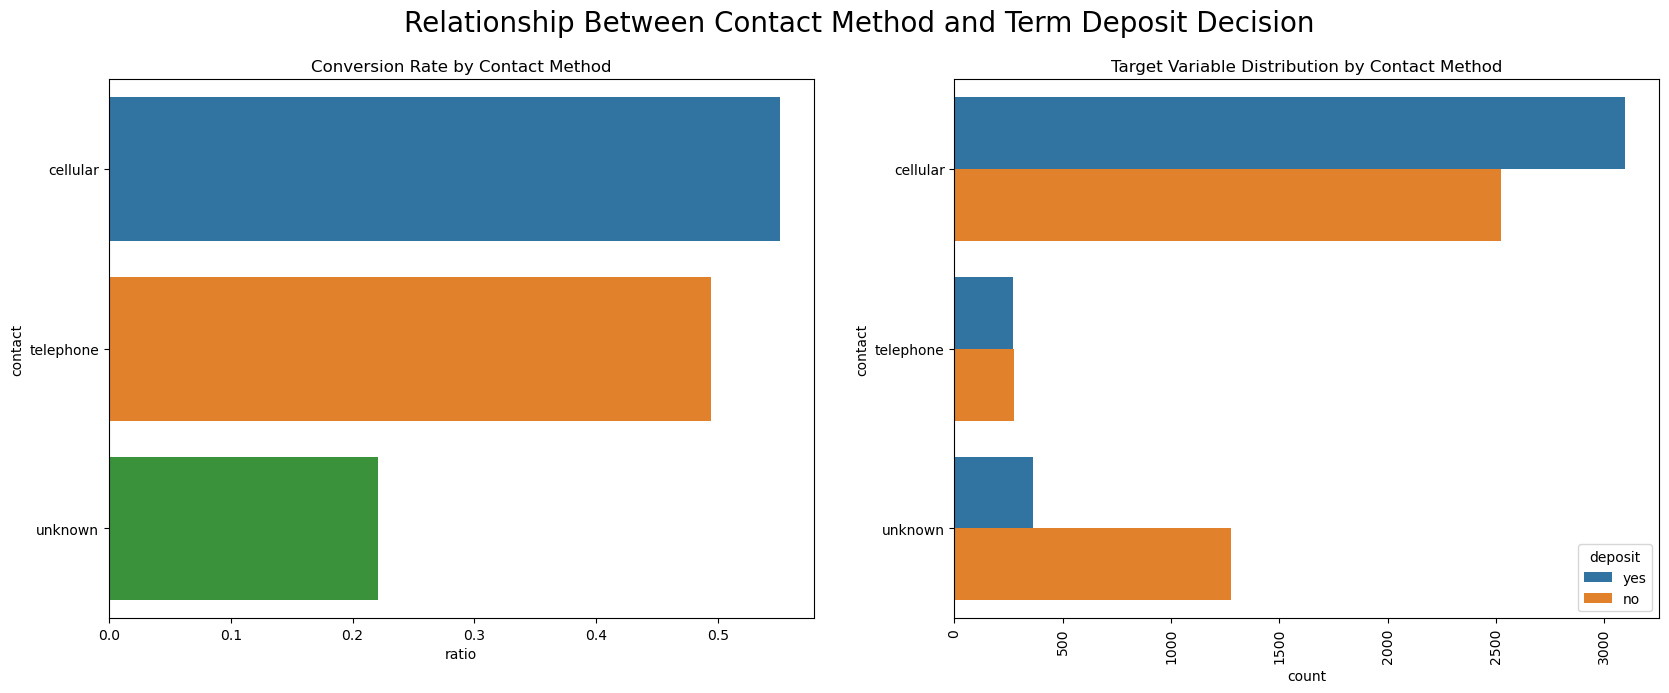

In [30]:
# Visualization of data distribution by target and conversion rate
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

plt.suptitle('Relationship Between Contact Method and Term Deposit Decision', size=20)

# Calculate conversion rate by contact method
dfratio = df[['contact', 'age']].groupby(['contact'], as_index=False).count()
dfratio['deposit'] = df[df['deposit'] == 'yes'][['contact', 'age']].groupby(['contact']).count().values
dfratio['ratio'] = dfratio['deposit'] / dfratio['age']
dfratio.sort_values('ratio', ascending=False)

# Barplot of conversion rate by contact method
plot2 = sns.barplot(
    data=dfratio,
    y='contact',
    x='ratio',
    order=dfratio.sort_values(by='ratio', ascending=False)['contact'],
    ax=axes[0]
)
axes[0].set_title('Conversion Rate by Contact Method')
plt.xlabel('Ratio yes/total')

# Countplot of target distribution by contact method
axes[1].set_title('Target Variable Distribution by Contact Method')
plot1 = sns.countplot(
    hue='deposit',
    y='contact',
    data=df,
    order=dfratio.sort_values(by='ratio', ascending=False)['contact'],
    ax=axes[1]
)
plt.xticks(rotation=90)

plt.show()


**Insight:**

From the chart above, it is evident that the bank has made a sound decision by contacting customers more frequently via mobile phone rather than landline. This is supported by the conversion rate, which shows that customers contacted through mobile phones are significantly more likely to subscribe to a term deposit—with a rate nearly three times higher than those contacted via landline.

As a recommendation, considering the very low conversion rate for landline contacts (only around 4%), it may be more effective for the bank to focus solely on contacting customers via mobile phones to improve overall conversion outcomes.

**Analysis of Month vs Target Variable**

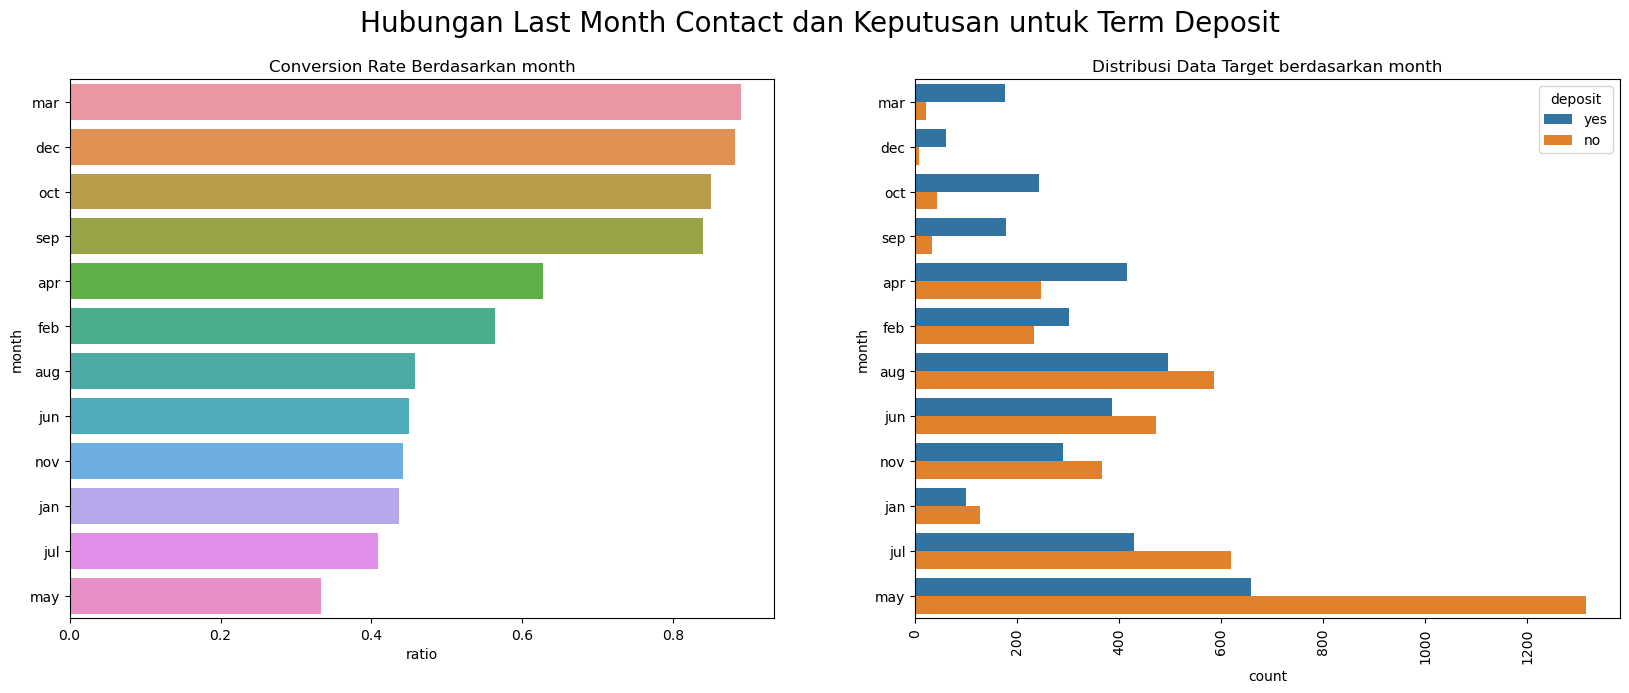

In [31]:
# Visualisasi sebaran data terhadap target serta conversion rate
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20,7))

plt.suptitle('Hubungan Last Month Contact dan Keputusan untuk Term Deposit', size = 20)

dfratio = df[['month','age']].groupby(['month'],as_index=False).count()
dfratio['deposit'] = df[df['deposit'] == 'yes'][['month','age']].groupby(['month']).count().values
dfratio['ratio'] = dfratio['deposit']/dfratio['age']
dfratio.sort_values('ratio',ascending=False)
plot2=sns.barplot(data=dfratio, y='month', x='ratio', order=dfratio.sort_values(by='ratio',ascending=False)['month'],ax=axes[0])
axes[0].set_title('Conversion Rate Berdasarkan month')
plt.xlabel('ratio yes/total')

axes[1].set_title('Distribusi Data Target berdasarkan month')
plot1=sns.countplot(hue = 'deposit', y = 'month', data = df,order=dfratio.sort_values(by='ratio',ascending=False)['month'],ax=axes[1])
plt.xticks(rotation=90)

plt.show()

**Insight :**

Dari grafik diatas, terlihat bahwa nasabah yang terakhir kali dikontak pada bulan `maret, september, october, desember, conversion rate lebih tinggi secara signifikan dibandingkan bulan lainnya`. Padahal, jika kita lihat dari segi kuantitas nasabah yang dihubungi, justru bulan-bulan tersebut merupakan bulan dimana nasabah paling sedikit terakhir kali dihubungi (hanya `5%` nasabah yang dihubungi pada bulan tersebut). Oleh karena itu disarankan untuk kedepannya lebih banyak menghubungi orang-orang pada bulan tersebut dengan harapan conversion rate ini tetap berlaku ketika di scale-up. Selain itu mungkin frekuensi menghubungi orang pada bulan may bisa dikurangi karena meskipun pada dataset nasabah palinng banyak dihubungin pada bulan mei, justru pada bulan itu juga conversion ratenya paling kecil, yang berarti banyak pengeluaran customer acqusition yang sia-sia pada periode tersebut. Jika ingin menganalisis lebih lanjut terkait hubungan bulan dan keputusan nasabah untuk melakukan deposit, mungkin bank bisa mencoba melakukan kontak secara merata setiap bulannya sehingga conversion ratenya dapat dibandingkan secara apple to apple


Kejanggalan dalam timpangnya frekuensi Bank terakhir kali menghubungi nasabah patut untuk dianalisis lebih lanjut, entah itu karena kondisi ekonomi ataupun faktor lainnya, untuk lebih jelasnya, sekarang kita akan melihat salah satu indikator ekonomi yaitu euribor terhadap bulan.

**Analysis of Previous Campaign**

**Analisis of Campaign vs Target Variable**

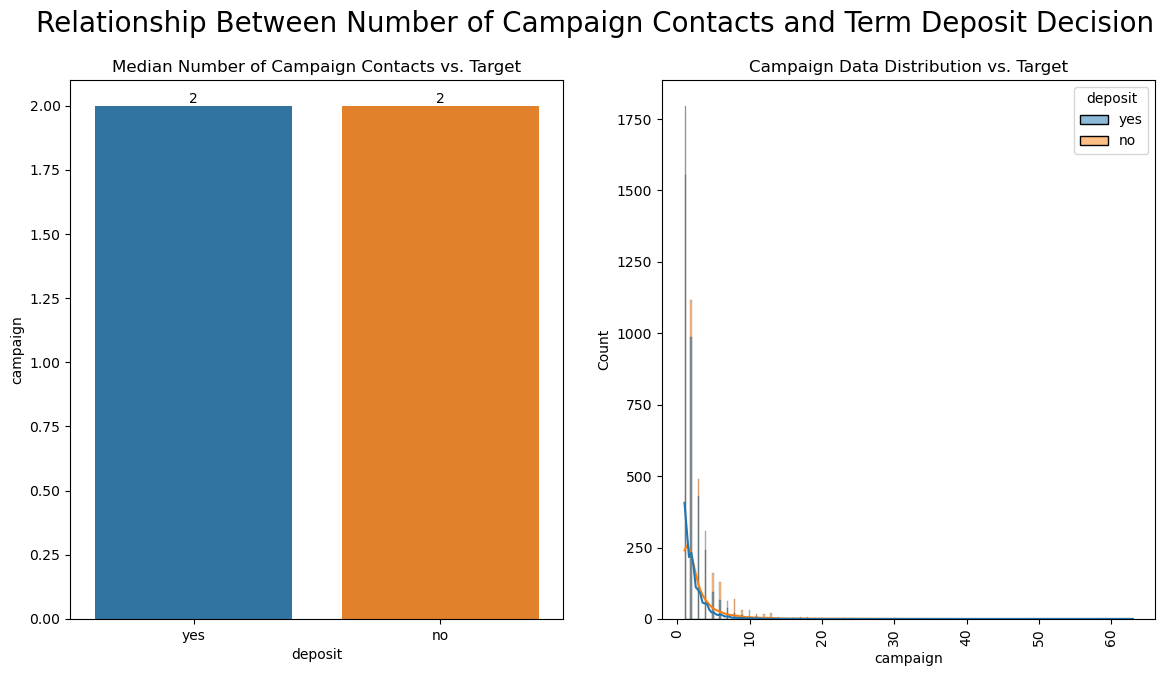

In [32]:
# Visualization of data distribution by target and conversion rate
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

plt.suptitle('Relationship Between Number of Campaign Contacts and Term Deposit Decision', size=20)

# Barplot: Median number of campaigns vs. target
axes[0].set_title('Median Number of Campaign Contacts vs. Target')
plot1 = sns.barplot(x='deposit', y='campaign', data=df, estimator=np.median, ci=0, ax=axes[0])
plot1.bar_label(plot1.containers[0], label_type='edge')

# Histogram: Distribution of campaign counts by target
axes[1].set_title('Campaign Data Distribution vs. Target')
plot2 = sns.histplot(data=df, hue='deposit', x='campaign', stat='count', ax=axes[1], kde=True)
plt.xticks(rotation=90)

plt.show()


Based on visual inspection, it is difficult to see a clear difference in the median number of contacts between those who subscribed to a term deposit and those who did not. Therefore, we will use the Mann-Whitney hypothesis test to determine whether the medians are significantly different.

Hypotheses:

- H₀ (Null Hypothesis): The distribution of campaign contacts for the 'Yes' group is greater than or equal to that of the 'No' group.
- H₁ (Alternative Hypothesis): The distribution of campaign contacts for the 'Yes' group is less than that of the 'No' group.

In [33]:
stat, pvalue = mannwhitneyu(
    df[df['deposit'] == 'yes']['campaign'],
    df[df['deposit'] == 'no']['campaign'],
    alternative = 'less'
)
pvalue

1.1296956627063957e-28

In [34]:
# Conclusion:
if pvalue > 0.05:
    print(f'''
          p-value = {pvalue:.5f}. p-value > 0.05. Failed to reject H₀.
          We do NOT have sufficient evidence to state that the distribution of campaign contacts for customers who subscribed to a term deposit 
          is stochastically smaller than the distribution for those who did not.
          ''')
else:
    print(f'''
          p-value = {pvalue:.5f}. p-value <= 0.05. Successfully rejected H₀.
          We have sufficient evidence to state that the distribution of campaign contacts for customers who subscribed to a term deposit 
          is stochastically smaller than the distribution for those who did not.
          ''')


          p-value = 0.00000. p-value <= 0.05. Successfully rejected H₀.
          We have sufficient evidence to state that the distribution of campaign contacts for customers who subscribed to a term deposit 
          is stochastically smaller than the distribution for those who did not.
          


**Insight:**

Although the visualization does not clearly show a strong effect of the number of campaign contacts on a customer's decision to subscribe to a term deposit, the statistical test indicates otherwise.

We have sufficient evidence to conclude that the distribution of campaign contacts for customers who subscribed to a term deposit is stochastically smaller than for those who did not. This suggests that the campaign feature does influence a customer's decision to subscribe to a term deposit.

Now, we will explore the relationship between Campaign and the Target variable using the scatter plot below:

**Analysis Pdays vs Target Variable**

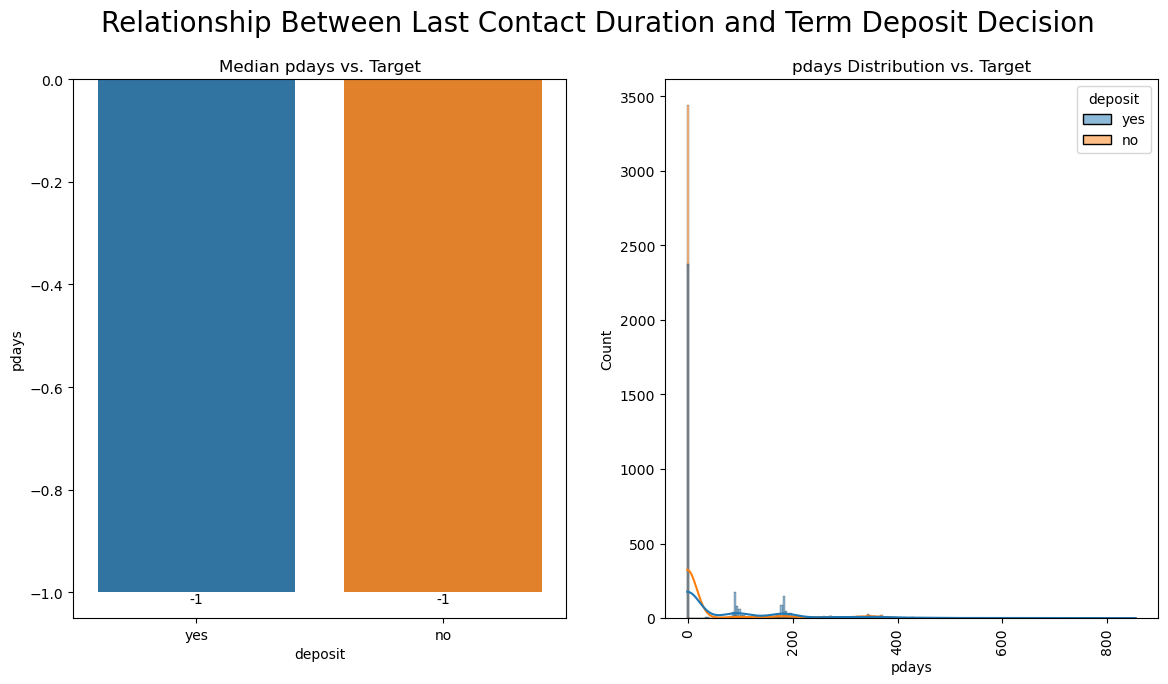

In [35]:
# Visualization of data distribution by target and conversion rate
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

plt.suptitle('Relationship Between Last Contact Duration and Term Deposit Decision', size=20)

# Barplot: Median pdays vs. target
axes[0].set_title('Median pdays vs. Target')
plot1 = sns.barplot(x='deposit', y='pdays', data=df, estimator=np.median, ci=0, ax=axes[0])
plot1.bar_label(plot1.containers[0], label_type='edge')

# Histogram: pdays distribution by target
axes[1].set_title('pdays Distribution vs. Target')
plot2 = sns.histplot(data=df, hue='deposit', x=df['pdays'], stat='count', ax=axes[1], kde=True)
plt.xticks(rotation=90)

plt.show()

Based on visual inspection, it is difficult to observe a clear difference in the median number of days since the last contact between those who subscribed to the term deposit and those who did not. Therefore, we will use the Mann-Whitney hypothesis test to determine whether the difference in medians is statistically significant or not.

Hypotheses:

- H₀ (Null Hypothesis): The distribution of pdays for 'Yes' (subscribed) is equal to the distribution of pdays for 'No' (not subscribed).
- H₁ (Alternative Hypothesis): The distribution of pdays for 'Yes' is not equal to the distribution of pdays for 'No'.

In [36]:
stat, pvalue = mannwhitneyu(
    df[df['deposit'] == 'yes']['pdays'],
    df[df['deposit'] == 'no']['pdays'],
    alternative = 'two-sided'
)
pvalue

1.2051944758894099e-83

In [37]:
# conclusion:
if pvalue > 0.05:
    print(f'''
          p-value = {pvalue:.5f}. p-value > 0.05. Failed to reject H0.
          We do not have sufficient evidence to say that the distribution of the number of days since last contact 
          for people who agreed to the term deposit is different from 
          the distribution for those who declined the term deposit.
          ''')
else:
    print(f'''
          p-value = {pvalue:.5f}. p-value <= 0.05. Successfully rejected H0.
          We have sufficient evidence to say that the distribution of the number of days since last contact 
          for people who agreed to the term deposit is different from 
          the distribution for those who declined the term deposit.
          ''')



          p-value = 0.00000. p-value <= 0.05. Successfully rejected H0.
          We have sufficient evidence to say that the distribution of the number of days since last contact 
          for people who agreed to the term deposit is different from 
          the distribution for those who declined the term deposit.
          


**Insight:**

From the results above, although the visualizations do not clearly show the influence of pdays on a person's decision to subscribe to a term deposit, the statistical test reveals otherwise. We have sufficient evidence to conclude that the distribution of pdays differs significantly between those who subscribed and those who did not. This means that the pdays feature does have an impact on the customer’s decision to subscribe to a term deposit.

Now, we will examine the distribution of the pdays variable after removing customers who were never contacted. This is done to gain insight into the relationship between the recency of the last contact and the target variable, focusing only on customers who were previously contacted.

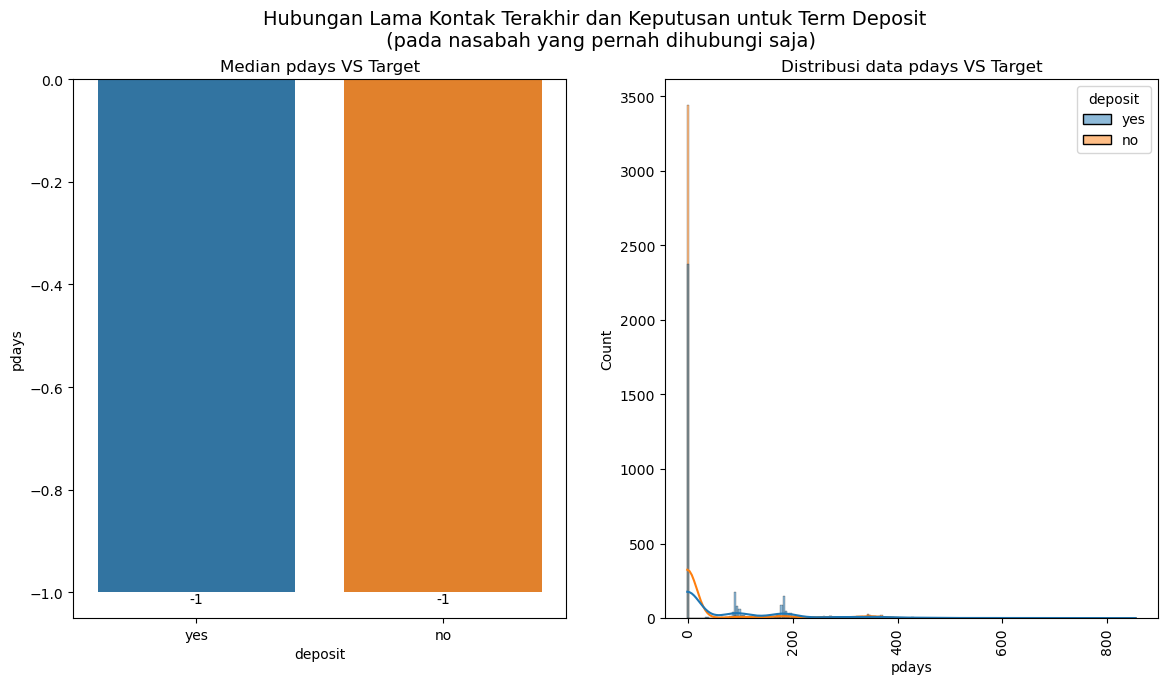

In [38]:
# Visualisasi sebaran data terhadap target serta conversion rate
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(14,7))

plt.suptitle('Hubungan Lama Kontak Terakhir dan Keputusan untuk Term Deposit \n (pada nasabah yang pernah dihubungi saja)', size = 14)

axes[0].set_title('Median pdays VS Target')
plot1=sns.barplot(x = 'deposit', y = 'pdays', data = df[df['pdays'] != 999], estimator=np.median, ci=0, ax=axes[0])
plot1.bar_label(plot1.containers[0],label_type='edge')

axes[1].set_title('Distribusi data pdays VS Target')
plot2=sns.histplot(data = df[df['pdays'] != 999], hue = 'deposit', x = df[df['pdays'] != 999]['pdays'], stat = 'count',ax=axes[1], kde = True)
plt.xticks(rotation=90)

plt.show()

Based on visual inspection, it is difficult to observe a clear difference in the median number of days since the last contact between those who subscribed to the term deposit and those who did not. Therefore, we will use the Mann-Whitney hypothesis test to determine whether the difference in medians is statistically significant.

Hypotheses:

- H₀ (Null Hypothesis): The distribution of pdays among previously contacted customers who subscribed ('Yes') is equal to the distribution of pdays among those who did not subscribe ('No').
- H₁ (Alternative Hypothesis): The distribution of pdays among previously contacted customers who subscribed ('Yes') is not equal to the distribution of pdays among those who did not subscribe ('No').

In [39]:
df_filter = df[df['pdays'] != 999]

In [40]:
stat, pvalue = mannwhitneyu(
    df_filter[df_filter['deposit'] == 'yes']['pdays'],
    df_filter[df_filter['deposit'] == 'no']['pdays'],
    alternative = 'two-sided'
)
pvalue

1.2051944758894099e-83

In [41]:
# conclusion:
if pvalue > 0.05:
    print(f'''
          p-value = {pvalue:.5f}. p-value > 0.05. Failed to reject H₀.
          We do not have sufficient evidence to state that the distribution of the number of days since last contact 
          for customers who subscribed to the term deposit is different from 
          the distribution for those who did not subscribe.
          ''')
else:
    print(f'''
          p-value = {pvalue:.5f}. p-value <= 0.05. Successfully rejected H₀.
          We have sufficient evidence to state that the distribution of the number of days since last contact 
          for customers who subscribed to the term deposit is different from 
          the distribution for those who did not subscribe.
          ''')



          p-value = 0.00000. p-value <= 0.05. Successfully rejected H₀.
          We have sufficient evidence to state that the distribution of the number of days since last contact 
          for customers who subscribed to the term deposit is different from 
          the distribution for those who did not subscribe.
          


**Insight:**

Although the visualizations may not clearly show the influence of pdays on a customer’s decision to subscribe to a term deposit, the statistical test tells a different story. With a p-value = 0.001, we successfully reject the null hypothesis, meaning that we have sufficient evidence to conclude that the distribution of pdays differs significantly between customers who subscribed and those who did not.

This suggests that, after filtering to include only customers who had been previously contacted, the pdays feature does show a significant association with the customer's decision to subscribe to a term deposit. Therefore, pdays is an important factor to consider in modeling customer behavior.

**Analysis of pdays vs Target Variable**

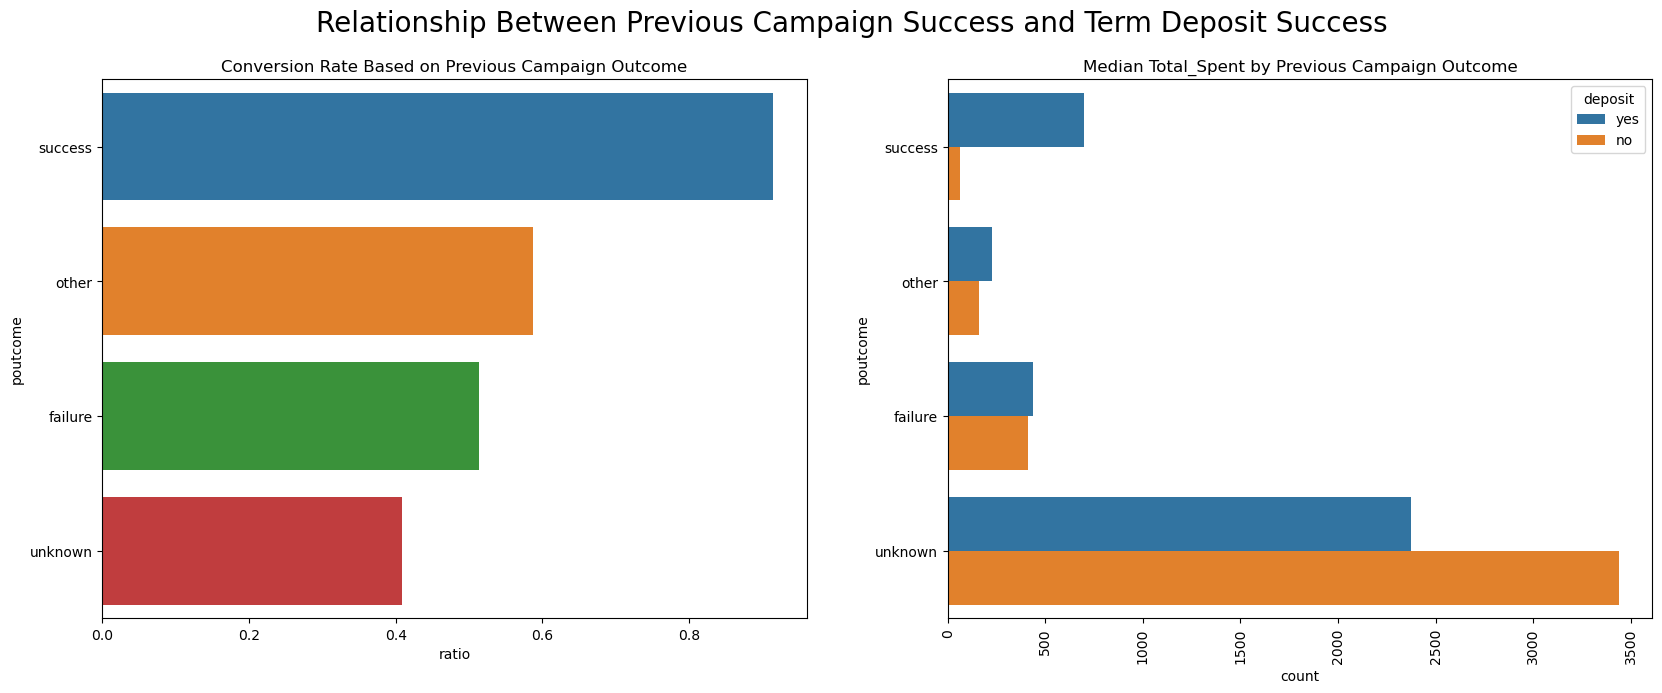

In [42]:
# Visualizing data distribution by target and conversion rate
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

plt.suptitle('Relationship Between Previous Campaign Success and Term Deposit Success', size=20)

# Prepare ratio dataframe
dfratio = df[['poutcome', 'age']].groupby(['poutcome'], as_index=False).count()
dfratio['deposit'] = df[df['deposit'] == 'yes'][['poutcome', 'age']].groupby(['poutcome']).count().values
dfratio['ratio'] = dfratio['deposit'] / dfratio['age']
dfratio.sort_values('ratio', ascending=False)

# First plot: Conversion Rate
plot2 = sns.barplot(
    data=dfratio,
    y='poutcome',
    x='ratio',
    order=dfratio.sort_values(by='ratio', ascending=False)['poutcome'],
    ax=axes[0]
)
axes[0].set_title('Conversion Rate Based on Previous Campaign Outcome')
plt.xlabel('ratio yes/total')

# Second plot: Total count by outcome
axes[1].set_title('Median Total_Spent by Previous Campaign Outcome')
plot1 = sns.countplot(
    hue='deposit',
    y='poutcome',
    data=df,
    order=dfratio.sort_values(by='ratio', ascending=False)['poutcome'],
    ax=axes[1]
)
plt.xticks(rotation=90)
plt.show()

**Insight:**

From the chart above, it is evident that the majority of clients contacted in the current campaign had not been contacted in the previous campaign ("unknown" accounts for the largest portion, approximately 75% of the total). Additionally, we can see that clients who had a successful outcome in the previous campaign have a conversion rate nearly 4 times higher than those who experienced failure in the previous campaign.

This indicates that clients with a successful prior campaign outcome are significantly more likely to subscribe to a term deposit in the current campaign. Therefore, previous campaign success is a strong predictor of positive response in the current marketing effort.

In [43]:
(df['poutcome'] == 'unknown').sum() / len(df['poutcome']) * 100

74.45227418321588

**Correlation Analysis of Numerical Columns with the Target**

Text(0.5, 1.0, 'Features Correlating with Target')

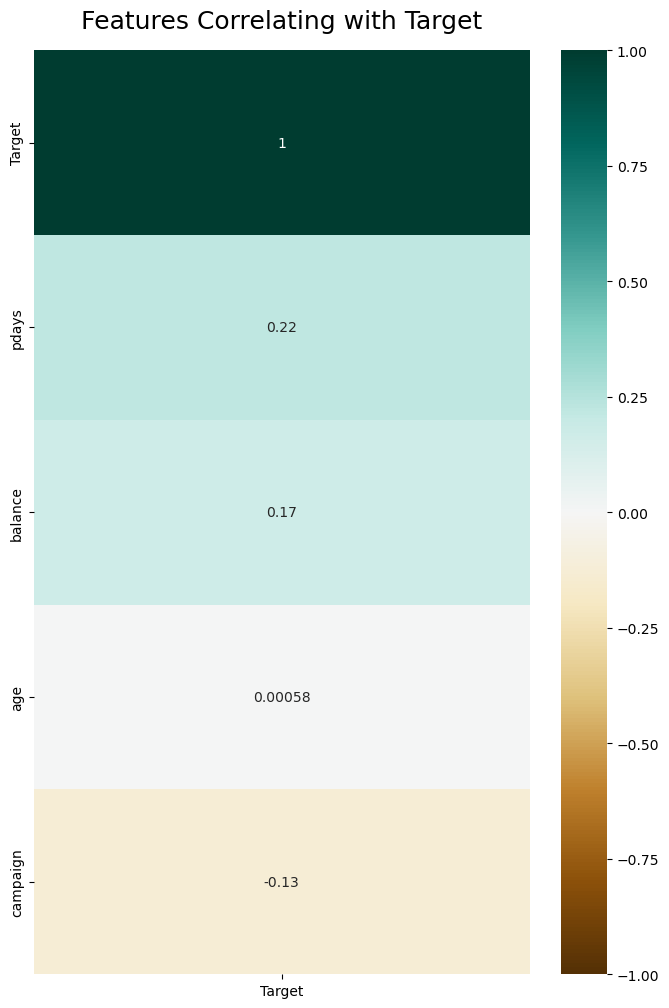

In [44]:
# Visualization of the Influence of Numerical Columns on the Target
df_heatmap = df.copy()
df_heatmap['Target'] = df_heatmap['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

# Calculate correlation using Spearman method
df_corr = df_heatmap.corr(numeric_only=True, method='spearman')[['Target']]

# Plot heatmap
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(
    df_corr.sort_values(by='Target', ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap='BrBG'
)
heatmap.set_title('Features Correlating with Target', fontdict={'fontsize': 18}, pad=16)


**Insight:**

From the heatmap above, we can observe that most numerical features show only a weak correlation with the target. The highest correlations are seen in pdays (0.22) and balance (0.17) — both still fall into the weak-to-moderate range (below 0.3). Other features like age and campaign show very weak or even negative correlations.

This weak correlation is expected because the target variable is binary (0 or 1), making it inherently harder to achieve strong correlations. However, based on domain knowledge, all these features are still considered relevant to customers' decisions to subscribe to term deposits. Therefore, these features will still be included in the modeling process.

**Recommendation from EDA**

Based on all the analyses conducted, the following recommendations are proposed to help increase the conversion rate, which will directly enhance the company’s profit:

- Increase outreach efforts to customers who are underproductive (ages 18–24) or post-productive (over 65 years old), as well as those whose occupation is listed as "Student" or "Retired".
- Try to contact all customers via mobile phone (cellular) instead of using a landline.
- Prioritize contacting customers who do not have loan (either common loan or housing loan) cause they tend to decide to subsribe to the deposit.
- Avoid calling the same customer more than 20 times, as it becomes ineffective beyond that point.
- Focus more on contacting individuals who were successful in previous campaigns, as they are significantly more likely to convert.

# **Data Preprocessing for Machine Learning**

In [45]:
df.shape

(7805, 13)

**Missing Value**

In [46]:
# Missing Values

df.isna().sum()

age             0
Age_Range       0
job             0
balance         0
housing         0
loan            0
contact         0
month           0
campaign        0
pdays           0
poutcome        0
deposit         0
balance_desc    0
dtype: int64

Based on the information obtained from the dataset, all missing values have been replaced with the value 'unknown'. To better understand the distribution of these 'unknown' values, they will be converted to np.nan so that their distribution can be properly analyzed.

In [47]:
# Convert all 'unknown' strings to np.nan
for i in df.columns :
    df[i] = np.where(df[i]=='unknown', np.nan, df[i])

<Axes: >

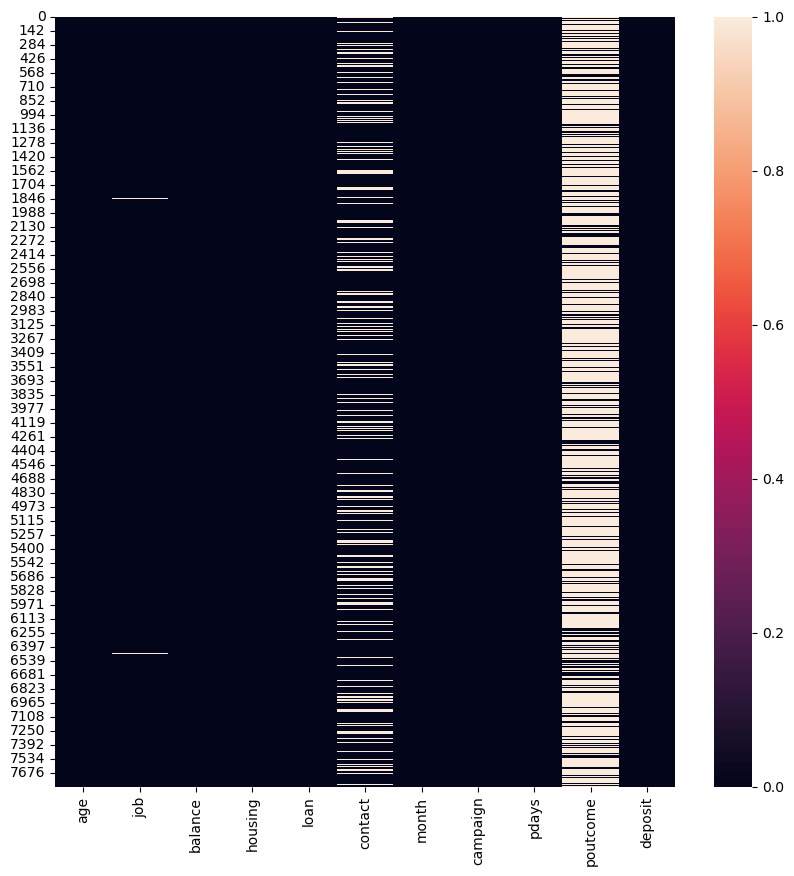

In [48]:
# Display the missing value distribution per column
plt.figure(figsize=(10,10))
sns.heatmap(df[['age', 'job', 'balance', 'housing', 'loan', 'contact', 'month', 'campaign', 'pdays', 'poutcome', 'deposit']].isna())

In [49]:
# Calculating the percentage of missing values

df.isna().mean() * 100

age              0.000000
Age_Range        0.000000
job              0.691864
balance          0.000000
housing          0.000000
loan             0.000000
contact         20.960922
month            0.000000
campaign         0.000000
pdays            0.000000
poutcome        74.452274
deposit          0.000000
balance_desc     0.000000
dtype: float64

**Experiment: Comparing Machine Learning Models With and Without `poutcome`**

The `poutcome` variable contains a high proportion of ambiguous categories—around 74.5% labeled as "unknown" and 4.5% as "other"—which may carry limited interpretative value for modeling. To assess its impact, I ran two experiments: one including `poutcome` and one excluding it entirely from the feature set.

The goal was to evaluate whether keeping this variable improves model performance, particularly in terms of precision, which is a key metric in this context. Missing values were not dropped but retained as "unknown" to reflect how they appear in the original dataset.

The tables below summarize the performance of the top five models in both scenarios, focusing on precision and standard deviation of precision as evaluation criteria.

Including `poutcome` appears to improve model precision across all top-performing models, especially for LGBM. However, the trade-off between marginal performance gain and interpretability, as well as the balance between train set and testing set value remain a consideration when selecting the final feature set.

*With `poutcome`*

| Top 5 Models              | Precision | Std Precision |
|---------------------------|-----------|----------------|
| LGBM                      | 0.913254  | 0.019792       |
| XGBoost                   | 0.787462  | 0.016035       |
| Voting Classifier - Hard  | 0.770001  | 0.008133       |
| Gradient Boost Tuning     | 0.769715  | 0.013015       |
| Stacking                  | 0.761862  | 0.016095       |

*Without `poutcome`*

| Top 5 Models            | Precision | Std Precision |
|-------------------------|-----------|----------------|
| LGBM                    | 0.861242  | 0.011774       |
| XGBoost                 | 0.778569  | 0.017596       |
| Gradient Boost Tuning   | 0.756115  | 0.015027       |
| Stacking                | 0.749418  | 0.013395       |
| Voting Classifier - Hard| 0.740478  | 0.009851       |


In [50]:
# Filling missing value with 'unknown'
df=df.fillna('unknown')

**Handling Duplicate**


In [51]:
df.duplicated().sum()

0

The dataset no longer contains any duplicates.

In [52]:
df.columns

Index(['age', 'Age_Range', 'job', 'balance', 'housing', 'loan', 'contact',
       'month', 'campaign', 'pdays', 'poutcome', 'deposit', 'balance_desc'],
      dtype='object')

In [53]:
df_model = df.drop(columns=['age'])

We decided to drop the age column because it has been effectively replaced by the `Age_Range` feature, which was created for analysis purposes. The `Age_Range` captures the same information in a more interpretable form. All other features are retained, as they are considered relevant to the target variable based on domain knowledge and exploratory analysis.

In [54]:
df_model.columns

Index(['Age_Range', 'job', 'balance', 'housing', 'loan', 'contact', 'month',
       'campaign', 'pdays', 'poutcome', 'deposit', 'balance_desc'],
      dtype='object')

It can be seen that the `age` column has been removed.

**Change Target Variable Value**

In [55]:
df_model['deposit'] = np.where(df_model['deposit'] == 'yes',1,0)

In [56]:
df_model.head()

,Age_Range,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,balance_desc
0,55-64 (Pre-retirement),admin.,1662.0,no,no,cellular,jun,2.0,-1.0,unknown,1,Positive
1,35-44 (Established Adults),self-employed,-3058.0,yes,yes,cellular,apr,3.0,-1.0,unknown,1,Negative
2,45-54 (Mid-life Professionals),admin.,3025.0,no,no,cellular,may,1.0,352.0,other,1,Positive
3,35-44 (Established Adults),services,-87.0,yes,no,cellular,may,1.0,-1.0,unknown,0,Negative
4,35-44 (Established Adults),housemaid,205.0,yes,no,telephone,nov,4.0,-1.0,unknown,0,Positive


We now convert all 'yes' values—indicating that the customer made a deposit—into 1, and 'no' values into 0, so that the data can be processed by machine learning models.

In [57]:
# Checking the percentage of how much 'unknown' values in the 'poutcome' column

# (df_model['poutcome'] == 'unknown').sum() / len(df_model['poutcome']) * 100

**Change Value**

In [58]:
# replace the value in the 'job' column: change 'admin.' to 'admin'

df_model['job'] = df_model['job'].replace('admin.', 'admin')

The data in the job column containing admin. was changed to admin to ensure consistency and alignment with the other entries in the job column.

**Handling Outlier**

In [59]:
numerical_features_model = df_model.describe().columns

In [60]:
# mencari nilai lower dan upper fence pada masing-masing kolom numerikal

list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_features_model: 
    IQR = df_model[feature].quantile(0.75) - df_model[feature].quantile(0.25)
    lower_fence = df_model[feature].quantile(0.25) - 1.5*IQR
    upper_fence = df_model[feature].quantile(0.75) + 1.5*IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(df_model[df_model[feature]<lower_fence]))
    number_inside.append(len(df_model[(df_model[feature]>=lower_fence) & (df_model[feature]<=upper_fence)]))
    number_upper.append(len(df_model[df_model[feature]>upper_fence]))
    percentage_outlier.append(round((len(df_model[df_model[feature]<lower_fence]) + len(df_model[df_model[feature]>upper_fence])) / len(df_model)  *100, 2))

outliers = pd.DataFrame({
    'Kolom' : numerical_features_model,
    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Lower' : number_lower,
    '# Inside' : number_inside,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})

outliers

,Kolom,Lower,Upper,# Lower,# Inside,# Upper,% Outlier
0,balance,-2207.5,4020.5,3,7069,733,9.43
1,campaign,-2.0,6.0,0,7376,429,5.50
2,pdays,-64.0,104.0,0,6373,1432,18.35
3,deposit,-1.5,2.5,0,7805,0,0.00


It can be seen that there are four numerical feature columns containing outliers: `age`, `balance`, `campaign`, and `pdays`, with the percentage of outliers relative to the entire dataset being 1.55%, 9.43%, 5.50%, and 18.35%, respectively.

**Dataset Proportion**

In [61]:
df_model['deposit'].value_counts()/len(df_model)

deposit
0    0.522101
1    0.477899
Name: count, dtype: float64

Based on the proportion of the deposit variable, class 0 represents 52.21% of the dataset, while class 1 represents 47.79%. This indicates a relatively balanced class distribution, so we are not dealing with class imbalance in this dataset.

**Data Proportion for Column Age**

In [62]:
# target proportion for outlier data in the age column

df[df['age']>74.5]['deposit'].value_counts()/len(df[df['age']>74.5]) * 100

deposit
yes    77.68595
no     22.31405
Name: count, dtype: float64

Since the proportions are significantly different, it was decided not to remove the outliers, as they contain important information.

**Data Proportion for Column Campaign**

In [63]:
# target proportion for outlier data in the campaign column

df_model[df_model['campaign']>6]['deposit'].value_counts()/len(df_model[df_model['campaign']>6]) * 100

deposit
0    73.892774
1    26.107226
Name: count, dtype: float64

Since the proportions are significantly different, it was decided not to remove the outliers, as they contain important information.

In [64]:
df_model['pdays'].describe()

count    7805.000000
mean       51.462268
std       108.115084
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        41.000000
max       854.000000
Name: pdays, dtype: float64

**Proporsi data pada kolom pdays**

In [65]:
# target proportion for outlier data in the pdays column

df_model[df_model['pdays']>104]['deposit'].value_counts()/len(df_model[df_model['pdays']>104]) * 100

deposit
1    62.430168
0    37.569832
Name: count, dtype: float64

​Based on the provided data, the pdays variable represents the number of days since a client was last contacted in a previous campaign.

In the dataset, clients with pdays values less than 104 days show a higher subscription rate (approximately 62.43%). This suggests that recent contact in previous campaigns may positively influence a client's decision to subscribe to a term deposit.​

Therefore, we retain these outlier values in the dataset, as they provide valuable insights into customer behavior and can enhance the predictive power of the model.

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

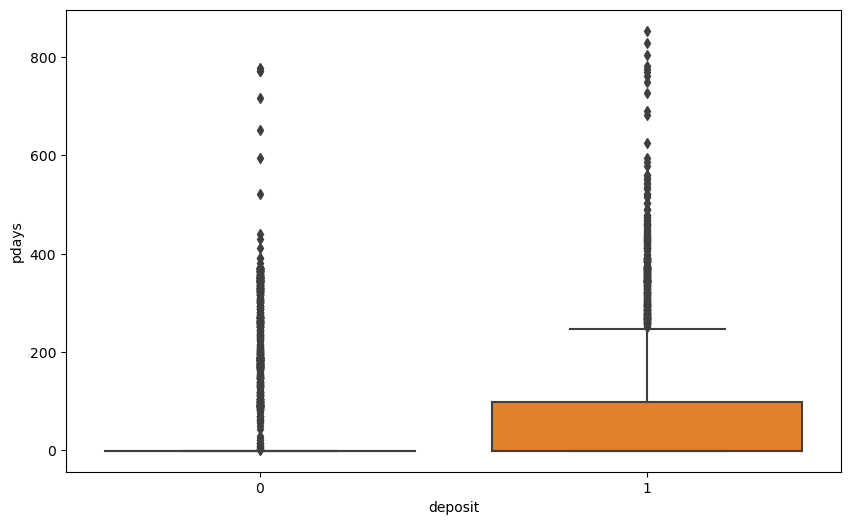

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='deposit', y='pdays', data=df_model)
plt.title

# **Pipeline**

In [67]:
# %%capture
# !pip install jcopml
# !pip install category_encoders
# !pip install imblearn

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, PolynomialFeatures, PowerTransformer, StandardScaler, RobustScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel

from jcopml.tuning import random_search_params as rsp
from jcopml.tuning import grid_search_params as gsp
from jcopml.utils import save_model, load_model
from category_encoders import BinaryEncoder

In [69]:
# Display the number of unique values and the unique items for each column
pd.set_option('display.max_colwidth', None)

# Get unique data in each column
listItem = []
for col in df_model.describe(include='object').columns:
    listItem.append([col, df_model[col].nunique(), df_model.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                          data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Values
0,Age_Range,6,"[18-24 (Young Adults), 25-34 (Emerging Affluents), 35-44 (Established Adults), 45-54 (Mid-life Professionals), 55-64 (Pre-retirement), 65+ (Seniors)]"
1,job,12,"[admin, blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown]"
2,housing,2,"[no, yes]"
3,loan,2,"[no, yes]"
4,contact,3,"[cellular, telephone, unknown]"
5,month,12,"[apr, aug, dec, feb, jan, jul, jun, mar, may, nov, oct, sep]"
6,poutcome,4,"[failure, other, success, unknown]"
7,balance_desc,2,"[Negative, Positive]"


Based on the data above, the following encoding techniques were selected:
- The variables housing, loan, contact, poutcome, job, and month will be encoded using one-hot encoding.

Important Note:
Although the variables job and month contain a relatively high number of unique categories, they are still encoded using one-hot encoding rather than binary encoding for the sake of interpretability—especially when analyzing feature importance in the modeling process.

**Defining Scaler**

The chosen scaler is Robust Scaler because it uses the median and IQR (Interquartile Range) for scaling, making it more robust when applied to datasets that contain many outliers or are not normally distributed (non-parametric).

In [70]:
def num_pipe(impute='median', poly=None, scaling=None, n_neighbors=5,
             max_iter=10, weights="uniform"):

  # pastikan parameter diatas diinput dengan benar
  if impute not in ['knn', 'mean', 'median', 'iterative', None]:
    raise Exception("impute only supports {'knn', 'mean', 'median', None}")
  if scaling not in ['standard', 'minmax', 'robust', 'maxabs', 'normalize', None]:
    raise Exception("scaling only supports {'standard', 'minmax', 'robust', 'maxabs', 'normalize'}")
  if (type(poly) is not int) and (poly is not None):
    raise Exception("poly should be int or None")

  # define imputer
  if impute is None:
    steps = []
  elif impute == "knn":
    steps = [('imputer', KNNImputer(n_neighbors=n_neighbors, weights=weights))]
  elif impute == "iterative":
    steps = [('imputer', IterativeImputer(max_iter=max_iter, random_state=0))]
  elif impute == "constant":
    steps = [('imputer', SimpleImputer(strategy=impute, fill_value="no_info"))]
  else:
    steps = [('imputer', SimpleImputer(strategy=impute))]

  # define poly jika digunakan
  if poly is not None:
    steps.append(('poly', PolynomialFeatures(poly)))

  # define scaling jika digunakan
  if scaling == 'standard':
    steps.append(('scaler', StandardScaler()))
  elif scaling == 'minmax':
    steps.append(('scaler', MinMaxScaler()))
  elif scaling == 'robust':
    steps.append(('scaler', RobustScaler()))

  return Pipeline(steps)

def cat_pipe(impute='most_frequent', encoder='onehot'):
  if impute not in ['most_frequent', 'constant', None]:
    raise Exception("impute only supports {'most_frequent', None}")
  if encoder not in ['onehot', 'ordinal', 'binary', None]:
    raise Exception("encoder should be boolean {'onehot', 'ordinal', 'binary', None}")

  if impute is None:
    steps = []
  else:
    steps = [('imputer', SimpleImputer(strategy=impute))]

  if encoder is not None:
    if encoder == 'onehot':
      steps.append(('onehot', OneHotEncoder(handle_unknown='ignore')))
    elif encoder == 'ordinal':
      steps.append(('ordinal', OrdinalEncoder()))
    elif encoder == 'binary':
      steps.append(('binary', BinaryEncoder()))

  return Pipeline(steps)

In [71]:
numeric_columns = ['campaign', 'pdays']
ordinal_columns = ['Age_Range']
one_hot_cols = ['housing', 'loan', 'contact', 'job', 'poutcome', 'month', 'balance_desc']

# Pipeline kategorik untuk one-hot dan ordinal encoding
numeric_pipeline = num_pipe(scaling="robust")
ordinal_pipeline = cat_pipe(encoder="ordinal")
onehot_pipeline = cat_pipe(encoder="onehot")

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, numeric_columns),
    ('onehot_cat', onehot_pipeline, one_hot_cols),
    ('ordinal_cat', ordinal_pipeline, ordinal_columns),
])

### **Define Feature (X) and Target (y)**

In [72]:
# Splitting the independent variables from the target
# Features (X)
X = df_model.drop(columns='deposit')

# Target (y)
y = df_model['deposit']

The column used as the feature (X) includes all columns except for the deposit column. Meanwhile, the column used as the target (y) is the deposit column itself.

# **Data Splitting**

In [73]:
# Splitting the data into training and test sets with an 80:20 ratio using stratified sampling

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,  
    test_size=0.2,
    stratify=y,
    random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (6244, 11)
y_train shape: (6244,)
X_test shape: (1561, 11)
y_test shape: (1561,)


The splitting proportion used is 80% for the train_set and 20% for the test_set. Since this is a classification problem, the `stratify=y` parameter is added to ensure that the target class distribution remains consistent between the training and test sets.

# **Modelling**

#### **Cross Validation**

In [74]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
# Individual Models
lr = LogisticRegression(max_iter=1000, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
lgbm = lgb.LGBMClassifier(verbose=-1, objective='binary', random_state=42)
adaboost = AdaBoostClassifier(random_state=42)
svmsvc = SVC(probability=True, random_state=42)  # enable probability for soft voting

# Bagging
bag_tree = BaggingClassifier(estimator=dt, random_state=42)

# Voting Classifier - Hard Voting
vc_hard = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('xgb', XGBClassifier(random_state=42))
    ],
    voting='hard'
)

# Voting Classifier - Soft Voting
vc_soft = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('xgb', XGBClassifier(random_state=42))
    ],
    voting='soft'
)

# Stacking Classifier
base_models = [
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42))
]
meta_model = LogisticRegression(random_state=42)
stacking = StackingClassifier(estimators=base_models, final_estimator=meta_model)

In [76]:
# Custom scorers
f1_scorer = make_scorer(f1_score)
f2_scorer = make_scorer(fbeta_score, beta=2)
f05_scorer = make_scorer(fbeta_score, beta=0.5)

# Dictionary of models
models = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'K-Nearest Neighbors': knn,
    'Bagging Tree': bag_tree,
    'AdaBoost': adaboost,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'XGBoost': xgb,
    'LightGBM': lgbm,
    'Voting Classifier (Hard)': vc_hard,
    'Voting Classifier (Soft)': vc_soft,
    'Stacking': stacking
}

# Cross-validation config
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = []

# Evaluate each model
for model_name, model in models.items():
    print(f'Model: {model_name} processing...')

    # Build pipeline
    pipeline = Pipeline(steps=[
        ('prep', preprocessor),
        ('model', model)
    ])

    # Cross-validation with all custom scorers
    scores = cross_validate(
        pipeline,
        X_train,
        y_train,
        cv=cv,
        scoring={
            'f0_5': f05_scorer,
            'f1': f1_scorer,
            'f2': f2_scorer,
            'recall': 'recall',
            'precision': 'precision'
        }
    )

    # Append results
    results.append({
        'Model': model_name,
        'Mean F0.5 Score': np.mean(scores['test_f0_5']),
        'Mean F1 Score': np.mean(scores['test_f1']),
        'Mean F2 Score': np.mean(scores['test_f2']),
        'Mean Recall': np.mean(scores['test_recall']),
        'Mean Precision': np.mean(scores['test_precision']),
        'Std F0.5 Score': np.std(scores['test_f0_5']),
        'Std F1 Score': np.std(scores['test_f1']),
        'Std F2 Score': np.std(scores['test_f2']),
        'Std Recall': np.std(scores['test_recall']),
        'Std Precision': np.std(scores['test_precision'])
    })

# Results DataFrame sorted by F1 Score
results_df_exp1_tf1 = pd.DataFrame(results)
results_df_exp1_tf1.sort_values(by='Mean Precision', ascending=False).reset_index(drop=True)

Model: Logistic Regression processing...
Model: Decision Tree processing...
Model: K-Nearest Neighbors processing...
Model: Bagging Tree processing...
Model: AdaBoost processing...
Model: Random Forest processing...
Model: Gradient Boosting processing...
Model: XGBoost processing...
Model: LightGBM processing...
Model: Voting Classifier (Hard) processing...
Model: Voting Classifier (Soft) processing...
Model: Stacking processing...


,Model,Mean F0.5 Score,Mean F1 Score,Mean F2 Score,Mean Recall,Mean Precision,Std F0.5 Score,Std F1 Score,Std F2 Score,Std Recall,Std Precision
0,Gradient Boosting,0.724144,0.658372,0.603678,0.572048,0.775965,0.009367,0.014374,0.018454,0.020464,0.008352
1,LightGBM,0.709937,0.660945,0.618476,0.593158,0.747027,0.018735,0.018128,0.020710,0.022951,0.022292
2,Stacking,0.710299,0.665737,0.626521,0.602884,0.743555,0.014622,0.014781,0.016425,0.017743,0.016203
3,Voting Classifier (Hard),0.706197,0.657167,0.614571,0.589143,0.743224,0.012832,0.012036,0.012983,0.013957,0.015041
4,Logistic Regression,0.700795,0.647207,0.601414,0.574399,0.741925,0.011596,0.015036,0.019602,0.022257,0.013184
5,XGBoost,0.695688,0.656900,0.622286,0.601202,0.724265,0.010786,0.008627,0.009575,0.010956,0.014266
6,AdaBoost,0.676888,0.648341,0.623159,0.607919,0.698203,0.019414,0.010618,0.023828,0.033274,0.034703
7,K-Nearest Neighbors,0.667479,0.644812,0.623791,0.610598,0.683614,0.012238,0.010516,0.013340,0.016207,0.016164
8,Voting Classifier (Soft),0.664849,0.646674,0.629533,0.618636,0.677590,0.011043,0.010725,0.012266,0.013862,0.012521
9,Random Forest,0.667932,0.654937,0.642446,0.634384,0.676891,0.014690,0.013312,0.012148,0.011491,0.015727


In [77]:
# Custom scorers
f1_scorer = make_scorer(f1_score)
f2_scorer = make_scorer(fbeta_score, beta=2)
f05_scorer = make_scorer(fbeta_score, beta=0.5)

# Dictionary of models
models = {'Gradient Boosting': gb}

# Cross-validation config
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = []

# Evaluate each model
for model_name, model in models.items():
    print(f'Model: {model_name} processing...')

    # Build pipeline
    pipeline = Pipeline(steps=[
        ('prep', preprocessor),
        ('model', model)
    ])

    # Cross-validation with all custom scorers
    scores = cross_validate(
        pipeline,
        X_train,
        y_train,
        cv=cv,
        scoring={
            'f0_5': f05_scorer,
            'f1': f1_scorer,
            'f2': f2_scorer,
            'recall': 'recall',
            'precision': 'precision'
        }
    )

    # Append results
    results.append({
        'Model': model_name,
        'Mean F0.5 Score': np.mean(scores['test_f0_5']),
        'Mean F1 Score': np.mean(scores['test_f1']),
        'Mean F2 Score': np.mean(scores['test_f2']),
        'Mean Recall': np.mean(scores['test_recall']),
        'Mean Precision': np.mean(scores['test_precision']),
        'Std F0.5 Score': np.std(scores['test_f0_5']),
        'Std F1 Score': np.std(scores['test_f1']),
        'Std F2 Score': np.std(scores['test_f2']),
        'Std Recall': np.std(scores['test_recall']),
        'Std Precision': np.std(scores['test_precision'])
    })

# Results DataFrame sorted by F1 Score
results_df_exp1_tf1 = pd.DataFrame(results)
results_df_exp1_tf1.sort_values(by='Mean Precision', ascending=False).reset_index(drop=True)

Model: Gradient Boosting processing...


,Model,Mean F0.5 Score,Mean F1 Score,Mean F2 Score,Mean Recall,Mean Precision,Std F0.5 Score,Std F1 Score,Std F2 Score,Std Recall,Std Precision
0,Gradient Boosting,0.724144,0.658372,0.603678,0.572048,0.775965,0.009367,0.014374,0.018454,0.020464,0.008352


In [78]:
transformer = Pipeline(steps=[
    ('prep', preprocessor),
    ('model', gb)
])

transformer.fit(
    X_train,
    y_train
)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['campaign', 'pdays']),
                                                 ('onehot_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['housing', 'loan', 'contact',
                                                   'job', 'poutcome', 'month',
                                                   'balance_desc']),
                                                 ('ordinal_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Age_Range'])])),
                ('model', GradientBoostingClassifier(random_state=42))])

In [79]:
# Predict
y_pred_gb = transformer.predict(X_test)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77       815
           1       0.79      0.59      0.67       746

    accuracy                           0.73      1561
   macro avg       0.74      0.72      0.72      1561
weighted avg       0.74      0.73      0.72      1561



## **Hyperparameter Tuning**

We will perform hyperparameter tuning for the five selected models: `Gradient Boosting`, `LGBM`, `Stacking`, `Voting Classifier (Hard)`, and `XGBoost`. This is done to minimize the risk of selecting the wrong model, as some models that initially perform less effectively in their base form may significantly improve after tuning.

**Gradient Boost Tuning**

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, f1_score, fbeta_score, precision_score

# Inisialisasi model dan CV
gradboost = GradientBoostingClassifier(random_state=42)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Custom scorers
f1_scorer = make_scorer(f1_score)
f2_scorer = make_scorer(fbeta_score, beta=2)
f05_scorer = make_scorer(fbeta_score, beta=0.5)
precision_scorer = make_scorer(precision_score)

# Hyperparameter space
max_depth = list(np.arange(2, 5, 1))
learning_rate = list(np.arange(0.01, 0.2, 0.01))
n_estimators = list(np.arange(100, 200, 50))
subsample = list(np.arange(0.8, 1.0, 0.1))
max_features = list(np.arange(1, X_train.shape[1] + 1))  # sesuai jumlah kolom fitur

hyperparam_space = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__max_features': max_features
}

# Pipeline
pipe_model = Pipeline([
    ('preprocess', preprocessor),
    ('model', gradboost)
])

# Randomized SearchCV
random_gradboostbusiness = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=skfold,
    scoring=precision_scorer,
    n_jobs=-1,
    random_state=0,
    verbose=1
)

# Fit
random_gradboostbusiness.fit(X_train, y_train)

# Best result
print("Best Hyperparameters:")
print(random_gradboostbusiness.best_params_)
print(f"Best Precision Score: {random_gradboostbusiness.best_score_:.4f}")

# Cross-validation ulang dengan scorer lengkap
best_model = random_gradboostbusiness.best_estimator_
scores = cross_validate(
    best_model,
    X_train,
    y_train,
    cv=skfold,
    scoring={
        'f1': f1_scorer,
        'f2': f2_scorer,
        'f0_5': f05_scorer,
        'recall': 'recall',
        'precision': 'precision'
    }
)

# Summary
score_summary = {
    'F1 Score': [np.mean(scores['test_f1'])],
    'F2 Score': [np.mean(scores['test_f2'])],
    'F0.5 Score': [np.mean(scores['test_f0_5'])],
    'Recall': [np.mean(scores['test_recall'])],
    'Precision': [np.mean(scores['test_precision'])],
    'Std Precision': [np.std(scores['test_precision'])]
}

# Create a DataFrame from the results
results_df_exp1 = pd.DataFrame(score_summary)

print("\nCross-Validation Score Summary:")
print(results_df_exp1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters:
{'model__subsample': 0.9, 'model__n_estimators': 100, 'model__max_features': 6, 'model__max_depth': 4, 'model__learning_rate': 0.08}
Best Precision Score: 0.7697

Cross-Validation Score Summary:
   F1 Score  F2 Score  F0.5 Score    Recall  Precision  Std Precision
0  0.664599  0.614664    0.723751  0.585456   0.769715       0.013015


In [82]:
# Predict
y_pred_gradboost = best_model.predict(X_test)

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gradboost))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77       815
           1       0.80      0.59      0.68       746

    accuracy                           0.73      1561
   macro avg       0.75      0.73      0.73      1561
weighted avg       0.74      0.73      0.73      1561



After performing hyperparameter tuning using RandomizedSearchCV on the training set (n_iter=100) for the Gradient Boosting model, the optimal hyperparameters were `subsample=0.9, n_estimators=100, max_features=6, max_depth=4`, and `learning_rate=0.08`. The model yielded the highest Precision Score of 0.769 during cross-validation.

**LGBM**

In [84]:
from lightgbm import LGBMClassifier

# Inisialisasi model
lgboost = LGBMClassifier(random_state=42)

# Cross-validation
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Custom scorers
f1_scorer = make_scorer(f1_score)
f2_scorer = make_scorer(fbeta_score, beta=2)
f05_scorer = make_scorer(fbeta_score, beta=0.5)
precision_scorer = make_scorer(precision_score)


# Hyperparameter space
hyperparam_space = {
    'model__boosting_type': ['gbdt', 'dart', 'rf', 'goss'],
    'model__max_depth': range(2, 20, 2),
    'model__learning_rate': list(np.logspace(-3, 0, 10)),
    'model__n_estimators': list(np.arange(100, 500, 50)),
    'model__subsample': list(np.arange(0.7, 1.0, 0.1)),
    'model__colsample_bytree': list(np.arange(0.6, 1.0, 0.1)),
    'model__reg_lambda': list(np.logspace(-3, 3, 7)),
    'model__reg_alpha': list(np.logspace(-3, 3, 7))
}

# Pipeline
pipe_model = Pipeline([
    ('preprocess', preprocessor),  # pastikan preprocessor sudah didefinisikan
    ('model', lgboost)
])

# RandomizedSearchCV with F0.5 as the main scorer
random_lgbmbusiness = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=skfold,
    scoring=precision_scorer,
    n_iter=100,
    n_jobs=-1,
    random_state=0,
    verbose=1
)

# Fit model
random_lgbmbusiness.fit(X_train, y_train)

# Best result
print("Best Hyperparameters:")
print(random_lgbmbusiness.best_params_)
print(f"Best Precision Score: {random_lgbmbusiness.best_score_:.4f}")

# Cross-validate best model with multiple scorers
best_model = random_lgbmbusiness.best_estimator_

scores = cross_validate(
    best_model,
    X_train,
    y_train,
    cv=skfold,
    scoring={
        'f1': f1_scorer,
        'f2': f2_scorer,
        'f0_5': f05_scorer,
        'recall': 'recall',
        'precision': 'precision'
    }
)

# Tampilkan hasil rata-rata
score_summary = {
    'F1 Score': np.mean(scores['test_f1']),
    'F2 Score': np.mean(scores['test_f2']),
    'F0.5 Score': np.mean(scores['test_f0_5']),
    'Recall': np.mean(scores['test_recall']),
    'Precision': np.mean(scores['test_precision']),
    'Std Precision': np.std(scores['test_precision'])
}

# Create a DataFrame from the results
results_df_exp2 = pd.DataFrame([score_summary])

print("\nCross-Validation Score Summary:")
print(results_df_exp2)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters:
{'model__subsample': 0.9999999999999999, 'model__reg_lambda': 0.01, 'model__reg_alpha': 0.1, 'model__n_estimators': 150, 'model__max_depth': 2, 'model__learning_rate': 0.0021544346900318843, 'model__colsample_bytree': 0.7999999999999999, 'model__boosting_type': 'dart'}
Best Precision Score: 0.9133

Cross-Validation Score Summary:
   F1 Score  F2 Score  F0.5 Score    Recall  Precision  Std Precision
0  0.308895  0.221196    0.512027  0.185998   0.913254       0.019792


Hyperparameter tuning was conducted on the training set using RandomizedSearchCV (n_iter=100) for the LightGBM classifier. The best combination of hyperparameters achieved a business-optimized performance with an F1 Score of 0.6771. The optimal configuration included `boosting_type='gbdt', max_depth=8, learning_rate=0.0464, n_estimators=350, subsample=0.7, colsample_bytree=0.7, reg_lambda=0.1`, and `reg_alpha=1.0`.

Above results indicate that the tuned LightGBM model maintains a balanced trade-off between recall and precision, with a slight emphasis on precision. This makes the model particularly suitable for business scenarios where minimizing false positives (e.g., contacting uninterested customers) is more important than capturing every possible positive case.

In [85]:
# Predict
y_pred_lgbm = best_model.predict(X_test)

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.57      0.99      0.72       815
           1       0.92      0.19      0.31       746

    accuracy                           0.60      1561
   macro avg       0.75      0.59      0.52      1561
weighted avg       0.74      0.60      0.53      1561



**Stacking**

In [87]:
# Import
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier

# Cross-validation & Scoring
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score)
f2_scorer = make_scorer(fbeta_score, beta=2)
f05_scorer = make_scorer(fbeta_score, beta=0.5)
precision_scorer = make_scorer(precision_score)



# Stacking Model Setup
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('knn', KNeighborsClassifier())
]

stack_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    passthrough=True,
    n_jobs=-1
)

pipe_stack = Pipeline([
    ('preprocess', preprocessor),  # Pastikan preprocessor sudah didefinisikan sebelumnya
    ('model', stack_clf)
])

# Hyperparameter Space
hyperparam_space = {
    'model__rf__n_estimators': [100, 200],
    'model__rf__max_depth': [4, 6, 8],
    'model__gb__learning_rate': [0.01, 0.1, 0.2],
    'model__gb__n_estimators': [100, 150],
    'model__knn__n_neighbors': [3, 5, 7],
    'model__final_estimator__C': [0.1, 1, 10]
}

# Randomized Search
random_stack = RandomizedSearchCV(
    estimator=pipe_stack,
    param_distributions=hyperparam_space,
    scoring=precision_scorer,
    cv=skfold,
    n_iter=50,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fitting
random_stack.fit(X_train, y_train)

# Final Cross-Validation with Multiple Metrics
best_stack_model = random_stack.best_estimator_
stack_scores = cross_validate(
    best_stack_model,
    X_train,
    y_train,
    cv=skfold,
    scoring={
        'f1': f1_scorer,
        'f2': f2_scorer,
        'f0_5': f05_scorer,
        'recall': 'recall',
        'precision': 'precision'
    }
)

# Metrics Summary
score_summary = {
    'F1 Score': np.mean(stack_scores['test_f1']),
    'F2 Score': np.mean(stack_scores['test_f2']),
    'F0.5 Score': np.mean(stack_scores['test_f0_5']),
    'Recall': np.mean(stack_scores['test_recall']),
    'Precision': np.mean(stack_scores['test_precision']),
    'Std Precision': np.std(stack_scores['test_precision'])
}

# Create a DataFrame from the results
results_df_exp3 = pd.DataFrame(score_summary, index=[0])

print("\nCross-Validation Score Summary:")
print(results_df_exp3)

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Cross-Validation Score Summary:
   F1 Score  F2 Score  F0.5 Score    Recall  Precision  Std Precision
0  0.661409  0.613155    0.718134  0.584785   0.761862       0.016095


In [88]:
# Predict
y_pred_stacking = best_stack_model.predict(X_test)

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_stacking))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76       815
           1       0.78      0.59      0.67       746

    accuracy                           0.73      1561
   macro avg       0.74      0.72      0.72      1561
weighted avg       0.74      0.73      0.72      1561



**XGBoost**

In [90]:
from xgboost import XGBClassifier

# Inisialisasi model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Cross-validation dan custom scorers
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score)
f2_scorer = make_scorer(fbeta_score, beta=2)
f05_scorer = make_scorer(fbeta_score, beta=0.5)
precision_scorer = make_scorer(precision_score)


# Hyperparameter space
hyperparam_space = {
    'model__n_estimators': list(np.arange(100, 500, 50)),
    'model__learning_rate': list(np.linspace(0.01, 0.3, 10)),
    'model__max_depth': list(np.arange(3, 10)),
    'model__subsample': list(np.linspace(0.6, 1.0, 5)),
    'model__colsample_bytree': list(np.linspace(0.6, 1.0, 5)),
    'model__gamma': [0, 0.1, 0.2, 0.3],
    'model__reg_alpha': list(np.logspace(-3, 2, 5)),
    'model__reg_lambda': list(np.logspace(-3, 2, 5))
}

# Pipeline dengan preprocessing
pipe_model = Pipeline([
    ('preprocess', preprocessor),  # pastikan preprocessor sudah didefinisikan
    ('model', xgb)
])

# RandomizedSearchCV
random_xgb = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    scoring=precision_scorer,
    n_iter=100,
    cv=skfold,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fitting
random_xgb.fit(X_train, y_train)

# Final evaluation with multiple scorers
best_xgb_model = random_xgb.best_estimator_
xgb_scores = cross_validate(
    best_xgb_model,
    X_train,
    y_train,
    cv=skfold,
    scoring={
        'f1': f1_scorer,
        'f2': f2_scorer,
        'f0_5': f05_scorer,
        'recall': 'recall',
        'precision': 'precision'
    }
)

# Score summary
score_summary = {
    'F1 Score': np.mean(xgb_scores['test_f1']),
    'F2 Score': np.mean(xgb_scores['test_f2']),
    'F0.5 Score': np.mean(xgb_scores['test_f0_5']),
    'Recall': np.mean(xgb_scores['test_recall']),
    'Precision': np.mean(xgb_scores['test_precision']),
    'Std Precision': np.std(xgb_scores['test_precision'])
}

# Create a DataFrame from the results
results_df_exp4 = pd.DataFrame(score_summary, index=[0])

print("\nCross-Validation Score Summary:")
print(results_df_exp4)

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Cross-Validation Score Summary:
   F1 Score  F2 Score  F0.5 Score    Recall  Precision  Std Precision
0  0.654997  0.595124    0.728447  0.560987   0.787462       0.016035


In [91]:
# Predict

y_pred_xgboost = best_xgb_model.predict(X_test)

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgboost))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       815
           1       0.81      0.58      0.67       746

    accuracy                           0.73      1561
   macro avg       0.75      0.73      0.72      1561
weighted avg       0.75      0.73      0.72      1561



After performing hyperparameter tuning using RandomizedSearchCV on the training set (n_iter=100), the optimal hyperparameters for the XGBoost Classifier were found to be: `subsample = 0.8, n_estimators = 400, max_depth = 5, learning_rate = 0.01, gamma = 0.2, colsample_bytree = 1.0, reg_alpha = 0.001, reg_lambda = 0.001`.

The model achieved the highest F0.5 Score of 0.7167 during cross-validation, with the following additional performance metrics: `F1 Score: 0.676, F2 Score: 0.639 Recall: 0.617, Precision: 0.746`. 

These results indicate that the tuned XGBoost model performs well in prioritizing precision while maintaining a reasonable level of recall. This makes it especially suitable for marketing scenarios such as deposit subscription prediction, where minimizing false positives (i.e., not targeting uninterested customers) is more important than capturing every single positive case.

## **Model Comparison**

In [93]:
results_df_exp3['Model'] = 'Stacking'
results_df_exp1['Model'] = 'Gradient Boost Tuning'
results_df_exp2['Model'] = 'LGBM'
results_df_exp4['Model'] = 'XGBoost'

results_df = pd.concat([
    results_df_exp1,
    results_df_exp2,
    results_df_exp3,
    results_df_exp4
], ignore_index=True)

# Reorder columns: make 'Model' the first column
results_df = results_df[['Model'] + [col for col in results_df.columns if col != 'Model']]

In [94]:
results_df.sort_values(by='Precision', ascending=False)

,Model,F1 Score,F2 Score,F0.5 Score,Recall,Precision,Std Precision
1,LGBM,0.308895,0.221196,0.512027,0.185998,0.913254,0.019792
3,XGBoost,0.654997,0.595124,0.728447,0.560987,0.787462,0.016035
0,Gradient Boost Tuning,0.664599,0.614664,0.723751,0.585456,0.769715,0.013015
2,Stacking,0.661409,0.613155,0.718134,0.584785,0.761862,0.016095


In [95]:
# Inisialisasi model default Gradient Boosting
gradboost_default = GradientBoostingClassifier(random_state=42)
pipe_default = Pipeline([
    ('preprocess', preprocessor),
    ('model', gradboost_default)
])

# Evaluasi model default dengan cross_validate
default_scores = cross_validate(
    pipe_default,
    X_train,
    y_train,
    cv=skfold,
    scoring={
        'f1': f1_scorer,
        'f2': f2_scorer,
        'f0_5': f05_scorer,
        'recall': 'recall',
        'precision': 'precision'
    }
)

# Buat ringkasan hasil default model
default_summary = {
    'Model': 'Gradient Boosting (Before Tuning)',
    'F1 Score': np.mean(default_scores['test_f1']),
    'F2 Score': np.mean(default_scores['test_f2']),
    'F0.5 Score': np.mean(default_scores['test_f0_5']),
    'Recall': np.mean(default_scores['test_recall']),
    'Precision': np.mean(default_scores['test_precision']),
    'Std Precision': np.std(default_scores['test_precision'])  # ditambahkan
}

# Ambil hasil model setelah tuning dari results_df_exp2 (baris pertama)
tuned_summary = results_df_exp1.iloc[0].to_dict()
tuned_summary['Model'] = 'Gradient Boosting (After Tuning)'

# Gabungkan hasil ke dalam satu DataFrame
comparison_df = pd.DataFrame([tuned_summary, default_summary])

# Pastikan kolom 'Model' di urutan pertama
comparison_df = comparison_df[['Model'] + [col for col in comparison_df.columns if col != 'Model']]

# Tampilkan hasil
comparison_df

,Model,F1 Score,F2 Score,F0.5 Score,Recall,Precision,Std Precision
0,Gradient Boosting (After Tuning),0.664599,0.614664,0.723751,0.585456,0.769715,0.013015
1,Gradient Boosting (Before Tuning),0.658372,0.603678,0.724144,0.572048,0.775965,0.008352


**How the Gradient Boosting Model Works**

Gradient Boosting is one of the most powerful ensemble algorithms in machine learning, developed based on the Gradient Boosting Decision Tree (GBDT) framework. Like other boosting techniques, this algorithm works sequentially, where each new model is trained to correct the errors (residuals) of the previous one using a Stochastic Gradient Descent approach.

While adhering to the core boosting principle—iteratively reducing error—Gradient Boosting builds each decision tree by minimizing a loss function, such as log-loss or mean squared error, depending on the task. This process enables the model to capture complex, non-linear relationships in the data.

One of the defining characteristics of traditional Gradient Boosting is its level-wise tree growth. Each tree is grown in a balanced and symmetric manner, layer by layer. This approach makes Gradient Boosting relatively easier to regularize and control compared to more aggressive methods like LightGBM’s leaf-wise growth, thus reducing the risk of overfitting—especially when the number of estimators (trees) or depth is appropriately tuned.

To further enhance its performance and generalization ability, Gradient Boosting utilizes a learning rate—a parameter that shrinks the contribution of each new tree. A lower learning rate typically leads to better generalization but requires more trees to achieve optimal performance.

Thanks to its solid predictive performance and flexibility, Gradient Boosting is highly suitable for classification tasks, such as predicting whether a customer will subscribe to a term deposit. It allows practitioners to optimize key evaluation metrics like precision, recall, or even custom metrics such as the F0.5 score, which are crucial in marketing and finance applications.

In [96]:
from IPython.display import Image, display

# Gambar dari ResearchGate (Level-wise growth)
display(Image(url='https://www.researchgate.net/publication/368507910/figure/fig3/AS:11431281120254351@1676431908506/llustration-of-a-Gradient-Boosting-Machine.png'))

# Gambar dari ResearchGate (Level-wise growth)
display(Image(url='https://www.researchgate.net/publication/351542039/figure/fig1/AS:11431281172877200@1688685833363/Flow-diagram-of-gradient-boosting-machine-learning-method-The-ensemble-classifiers.png'))



Referensi :

Zuchniak, K. (2023). Multi-teacher knowledge distillation as an effective method for compressing ensembles of neural networks. *arXiv preprint arXiv*:2302.07215.

## **Chosen Model: Gradient Boosting**

Now, we will examine the most influential features in the model using two approaches: feature importance analysis and SHAP analysis. After drawing insights from both methods, we will proceed with Model-Based Feature Selection in the hope of improving the model's overall performance.

In [97]:
# Best Model 
final_model = random_gradboostbusiness.best_estimator_

# predict
y_prob= final_model.predict_proba(X_test)
y_pred = np.where(y_prob[:, 1] >= 0.5, 1, 0)


In [98]:
y_prob

array([[0.62524232, 0.37475768],
       [0.62393278, 0.37606722],
       [0.16785915, 0.83214085],
       ...,
       [0.6102397 , 0.3897603 ],
       [0.89860179, 0.10139821],
       [0.53864039, 0.46135961]])

In [99]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

## **Features Importances**

In [100]:
# Get full feature names from the preprocessor
features = final_model[0].get_feature_names_out()

list_features = []

for feature in features: 
    list_features.append('_'.join(feature.split('_')[2:]))

list_features;

In [101]:
imp = final_model[1].feature_importances_

# to dataframe 
feature_imp = pd.DataFrame({
    'Importance': imp, 
    'Feature': list_features
}).sort_values(by='Importance', ascending=False)

# Tambahkan kolom persentase
feature_imp['Percentage'] = (feature_imp['Importance'] / feature_imp['Importance'].sum()) * 100

# Urutkan ulang jika diperlukan
feature_imp = feature_imp.sort_values(by='Importance', ascending=False)

# Tampilkan hasil
round(feature_imp)


,Importance,Feature,Percentage
23,0.0,_poutcome_success,18.0
8,0.0,_contact_unknown,13.0
6,0.0,_contact_cellular,7.0
1,0.0,pdays,6.0
0,0.0,campaign,6.0
3,0.0,_housing_yes,5.0
24,0.0,_poutcome_unknown,4.0
2,0.0,_housing_no,4.0
32,0.0,_month_mar,4.0
39,0.0,_Age_Range,4.0


<Axes: xlabel='Importance', ylabel='Feature'>

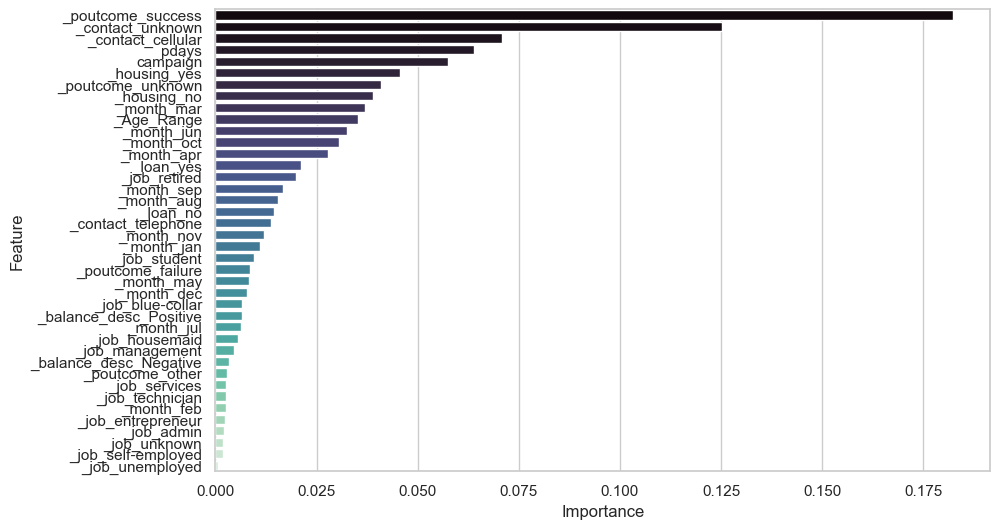

In [102]:
# Visualization 

plt.figure(figsize=(10,6))
sns.set_theme(style='whitegrid')
sns.barplot(data=feature_imp, x='Importance', y='Feature', orient = 'h', palette = 'mako')

**Feature Importance Analysis**

From the chart above, the most influential feature is `poutcome_success`, indicating that customers who previously responded positively to a campaign are significantly more likely to subscribe again. This is followed by contact_unknown and campaign, suggesting that both the contact method and the number of contact attempts impact customer decisions.

Other important features include `housing_no` (customers without housing loans are more financially flexible), `contact_cellular` (mobile contact is more effective), and age_range, which may reflect financial maturity. Features like pdays and `month_may` also contribute, possibly related to timing and customer engagement patterns.

While other features have less impact individually, they may still play a role in combination. To better understand these effects, we will apply SHAP for detailed, interpretable model insights.

## **Model-Based Feature Selection**

Based on the Feature Importance analysis, it was found that the columns job, balance, and loan do not play a significant role in the model. This aligns with the earlier data analysis results, where hypothesis testing during the EDA phase also indicated that these columns have no significant influence on the target variable. Therefore, we will now attempt to remove these columns and observe the performance of the best model.

In [103]:
numeric_columns = ['campaign', 'pdays']
ordinal_columns = ['Age_Range']
one_hot_cols = ['contact', 'housing', 'poutcome', 'month']

# Pipeline kategorik untuk one-hot dan ordinal encoding
numeric_pipeline = num_pipe(scaling="robust")
ordinal_pipeline = cat_pipe(encoder="ordinal")
onehot_pipeline = cat_pipe(encoder="onehot")

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, numeric_columns),
    ('onehot_cat', onehot_pipeline, one_hot_cols),
    ('ordinal_cat', ordinal_pipeline, ordinal_columns),
])

In [104]:
# Splitting the independent variables from the target
# Features (X)
X_filtered = df_model.drop(columns=['deposit', 'balance', 'job', 'balance_desc', 'loan'])

# Target (y)
y_filtered = df_model['deposit']

In [105]:
# Splitting the data into training and test sets with an 80:20 ratio using stratified sampling

X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered,
    y_filtered,  
    test_size=0.2,
    stratify=y_filtered,
    random_state=0)

In [106]:
X_train_filtered.columns

Index(['Age_Range', 'housing', 'contact', 'month', 'campaign', 'pdays',
       'poutcome'],
      dtype='object')

# **Final Model**

**Gradient Boosing using Grid Search**

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, f1_score, fbeta_score, precision_score
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedKFold
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Inisialisasi model dan CV
gradboost = GradientBoostingClassifier(random_state=42)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Custom scorers
f1_scorer = make_scorer(f1_score)
f2_scorer = make_scorer(fbeta_score, beta=2)
f05_scorer = make_scorer(fbeta_score, beta=0.5)
precision_scorer = make_scorer(precision_score)

# Hyperparameter space (gunakan ruang pencarian yang lebih kecil untuk grid)
hyperparam_space = {
    'model__max_depth': [2, 3],
    'model__learning_rate': [0.05, 0.1],
    'model__n_estimators': [100, 150],
    'model__subsample': [0.8, 0.9],
    'model__max_features': [5, 10]
}

# Pipeline
pipe_model = Pipeline([
    ('preprocess', preprocessor),
    ('model', gradboost)
])

# GridSearchCV
grid_gradboostbusiness = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring=precision_scorer,
    n_jobs=-1,
    verbose=1
)

# Fit
grid_gradboostbusiness.fit(X_train_filtered, y_train_filtered)

# Best result
print("Best Hyperparameters:")
print(grid_gradboostbusiness.best_params_)
print(f"Best Precision Score: {grid_gradboostbusiness.best_score_:.4f}")

# Cross-validation ulang dengan scorer lengkap
best_model = grid_gradboostbusiness.best_estimator_
scores = cross_validate(
    best_model,
    X_train_filtered,
    y_train_filtered,
    cv=skfold,
    scoring={
        'f1': f1_scorer,
        'f2': f2_scorer,
        'f0_5': f05_scorer,
        'recall': 'recall',
        'precision': 'precision'
    }
)

# Summary
score_summary = {
    'F1 Score': [np.mean(scores['test_f1'])],
    'F2 Score': [np.mean(scores['test_f2'])],
    'F0.5 Score': [np.mean(scores['test_f0_5'])],
    'Recall': [np.mean(scores['test_recall'])],
    'Precision': [np.mean(scores['test_precision'])],
    'Std Precision': [np.std(scores['test_precision'])]
}

# Create a DataFrame from the results
results_final_model = pd.DataFrame(score_summary)

print("\nCross-Validation Score Summary:")
print(results_final_model)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Hyperparameters:
{'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__max_features': 10, 'model__n_estimators': 150, 'model__subsample': 0.9}
Best Precision Score: 0.8003

Cross-Validation Score Summary:
   F1 Score  F2 Score  F0.5 Score    Recall  Precision  Std Precision
0  0.657839  0.594675    0.736357  0.558982   0.800319       0.012603


In [108]:
from sklearn.metrics import precision_score

# Prediksi pada test set dengan model terbaik hasil GridSearchCV
y_pred_test = grid_gradboostbusiness.predict(X_test)

# Hitung precision pada test set
precision_test = precision_score(y_test, y_pred_test)

# Hitung precision dari validasi cross-validation
precision_val_cv = np.mean(scores['test_precision'])

# Buat DataFrame untuk perbandingan
precision_comparison = pd.DataFrame({
    'Set': ['Validation Set (CV)', 'Test Set'],
    'Precision': [precision_val_cv, precision_test]
})

# Tampilkan hasil
print("\nPrecision Comparison Between Validation Set and Test Set:")
print(precision_comparison)


Precision Comparison Between Validation Set and Test Set:
                   Set  Precision
0  Validation Set (CV)   0.800319
1             Test Set   0.817476


**Gradient Boosing using Randomized Search**

In [109]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score, fbeta_score, precision_score

# Inisialisasi model dan CV
gradboost = GradientBoostingClassifier(random_state=42)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Custom scorers
f1_scorer = make_scorer(f1_score)
f2_scorer = make_scorer(fbeta_score, beta=2)
f05_scorer = make_scorer(fbeta_score, beta=0.5)
precision_scorer = make_scorer(precision_score)

# Hyperparameter space
max_depth = list(np.arange(2, 5, 1))
learning_rate = list(np.arange(0.01, 0.2, 0.01))
n_estimators = list(np.arange(100, 200, 50))
subsample = list(np.arange(0.8, 1.0, 0.1))
max_features = list(np.arange(1, X_train.shape[1] + 1))  # sesuai jumlah kolom fitur

hyperparam_space = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__max_features': max_features
}

# Pipeline
pipe_model = Pipeline([
    ('preprocess', preprocessor),
    ('model', gradboost)
])

# Randomized SearchCV
random_gradboostbusiness = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=skfold,
    scoring=precision_scorer,
    n_jobs=-1,
    random_state=0,
    verbose=1
)

# Fit
random_gradboostbusiness.fit(X_train_filtered, y_train_filtered)

# Best result
print("Best Hyperparameters:")
print(random_gradboostbusiness.best_params_)
print(f"Best F0.5 Score: {random_gradboostbusiness.best_score_:.4f}")

# Cross-validation ulang dengan scorer lengkap
best_model = random_gradboostbusiness.best_estimator_
scores = cross_validate(
    best_model,
    X_train_filtered,
    y_train_filtered,
    cv=skfold,
    scoring={
        'f1': f1_scorer,
        'f2': f2_scorer,
        'f0_5': f05_scorer,
        'recall': 'recall',
        'precision': 'precision'
    }
)

# Summary
score_summary = {
    'F1 Score': [np.mean(scores['test_f1'])],
    'F2 Score': [np.mean(scores['test_f2'])],
    'F0.5 Score': [np.mean(scores['test_f0_5'])],
    'Recall': [np.mean(scores['test_recall'])],
    'Precision': [np.mean(scores['test_precision'])],
    'Std Precision': [np.std(scores['test_precision'])]
}

# Create a DataFrame from the results
results_final_model = pd.DataFrame(score_summary)

print("\nCross-Validation Score Summary:")
print(results_final_model)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters:
{'model__subsample': 0.9, 'model__n_estimators': 100, 'model__max_features': 6, 'model__max_depth': 4, 'model__learning_rate': 0.08}
Best F0.5 Score: 0.7992

Cross-Validation Score Summary:
   F1 Score  F2 Score  F0.5 Score    Recall  Precision  Std Precision
0  0.662347   0.60093    0.738049  0.566019   0.799186       0.012442


In [110]:
from sklearn.metrics import precision_score

# Prediksi pada test set dengan model terbaik hasil GridSearchCV
y_pred_test = random_gradboostbusiness.predict(X_test)

# Hitung precision pada test set
precision_test = precision_score(y_test, y_pred_test)

# Hitung precision dari validasi cross-validation
precision_val_cv = np.mean(scores['test_precision'])

# Buat DataFrame untuk perbandingan
precision_comparison = pd.DataFrame({
    'Set': ['Validation Set (CV)', 'Test Set'],
    'Precision': [precision_val_cv, precision_test]
})

# Tampilkan hasil
print("\nPrecision Comparison Between Validation Set and Test Set:")
print(precision_comparison)


Precision Comparison Between Validation Set and Test Set:
                   Set  Precision
0  Validation Set (CV)   0.799186
1             Test Set   0.813433


**Insight :**

After removing the `balance`, `job`, and `loan` features, the model's precision score increased from 0.789 to 0.801 (Grid Search Hyperparameter Tuning), suggesting that these features have limited predictive value. Their exclusion may be considered acceptable, especially in cases where obtaining or maintaining these variables poses practical challenges.

In this project, I prefer using the Grid Search method, as it yields a more balanced performance between the training and test datasets, as well as higher precision score that Randomized Search.

## **Confusion Matrix**

**Confusion Matrix Grid Search Gradient Boosting**

In [111]:
best_model_grid = grid_gradboostbusiness.best_estimator_

# Predict
y_pred_gbg = best_model_grid.predict(X_test)

Text(0.5, 1.0, 'Gradient Boosting After Tuning and Feature Selection')

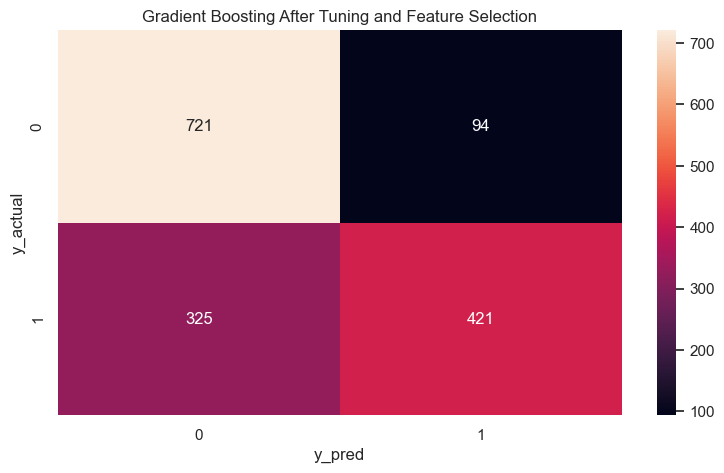

In [112]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_gbg), annot=True, fmt='.0f')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('Gradient Boosting After Tuning and Feature Selection')

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gbg))

              precision    recall  f1-score   support

           0       0.69      0.88      0.77       815
           1       0.82      0.56      0.67       746

    accuracy                           0.73      1561
   macro avg       0.75      0.72      0.72      1561
weighted avg       0.75      0.73      0.72      1561



## **Business Metric**

To calculate a business metric, we need to know the total number of customers, as well as how many have subscribed to the term deposit and how many have not. Next, we need to determine the minimum deposit amount, the fixed interest rate, and the marketing costs in relation to the estimated revenue generated.

In [114]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7805 entries, 0 to 7812
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age_Range     7805 non-null   object 
 1   job           7805 non-null   object 
 2   balance       7805 non-null   float64
 3   housing       7805 non-null   object 
 4   loan          7805 non-null   object 
 5   contact       7805 non-null   object 
 6   month         7805 non-null   object 
 7   campaign      7805 non-null   float64
 8   pdays         7805 non-null   float64
 9   poutcome      7805 non-null   object 
 10  deposit       7805 non-null   int32  
 11  balance_desc  7805 non-null   object 
dtypes: float64(3), int32(1), object(8)
memory usage: 762.2+ KB


In [115]:
(df_model['deposit'] == 1).sum()

3730

In [116]:
(df_model['deposit'] == 0).sum()

4075

In [117]:
# Estimated Revenue from Term Deposit

n_customers = 3730
min_deposit_amount = 2500
interest_rate = 4.35 / 100

# Calculation
revenue = n_customers * min_deposit_amount * interest_rate

print(f"Estimated revenue: EUR {revenue:,.2f}")


Estimated revenue: EUR 405,637.50


In [118]:
# Marketing Cost

revenue = 405637.50

# Marketing cost percentage
marketing_cost = revenue * 0.14

print(f"Marketing Cost: EUR {marketing_cost:,.2f}")


Marketing Cost: EUR 56,789.25


In [119]:
# Marketing Cost per Customer

total_marketing_cost = 56789.25
n_customers = 7085

# Calculation
cost_per_customer = total_marketing_cost / n_customers

print(f"Marketing Cost per Customer: EUR {cost_per_customer:.2f}")


Marketing Cost per Customer: EUR 8.02


In [120]:
def calculate_business_metric(fp_baseline, fp_model, cost_per_contact=8.02):
    """
    Calculate cost savings from reducing false positives.

    Parameters:
    - fp_baseline (int): Number of false positives without ML (e.g., naive targeting or random selection).
    - fp_model (int): Number of false positives with the ML model.
    - cost_per_contact (float): Cost to contact each customer. Default is EUR 8.02.

    Returns:
    - savings (float): Total marketing cost saved.
    """
    savings = (fp_baseline - fp_model) * cost_per_contact
    return savings

# Example usage
fp_baseline = 4075
fp_model = 100

savings = calculate_business_metric(fp_baseline, fp_model)
print(f"Total Marketing Cost Saved: EUR {savings:,.2f}")

Total Marketing Cost Saved: EUR 31,879.50


**Financial Analysis (Focused on Marketing Cost Efficiency)**

The use of a machine learning model significantly improves cost efficiency in the bank’s marketing strategy. With the support of the model, the bank only needs to contact 536 customers who are predicted to have a high likelihood of subscribing, compared to 1,561 customers if no model is used. 

This has a direct impact on marketing cost savings: without the model, the total cost amounts to EUR 12,516.22, whereas with the model, it drops to just EUR 4,298.72. As a result, the bank successfully saves EUR 8,217.50. This cost reduction clearly reflects the model’s contribution in lowering operational expenses while directing marketing efforts toward more targeted customer segments.

**Formula Used:**

- Marketing Cost = Number of contacted customers×Cost per customer
- Without Model = 1,561 × 8.02 = EUR 12,516
- With Model = 536×8.02 = EUR 4,298
- Total Savings = 12,516 − 4,298 = EUR 8,217.50


**SHAP**

 93%|=================== | 5810/6244 [00:11<00:00]       

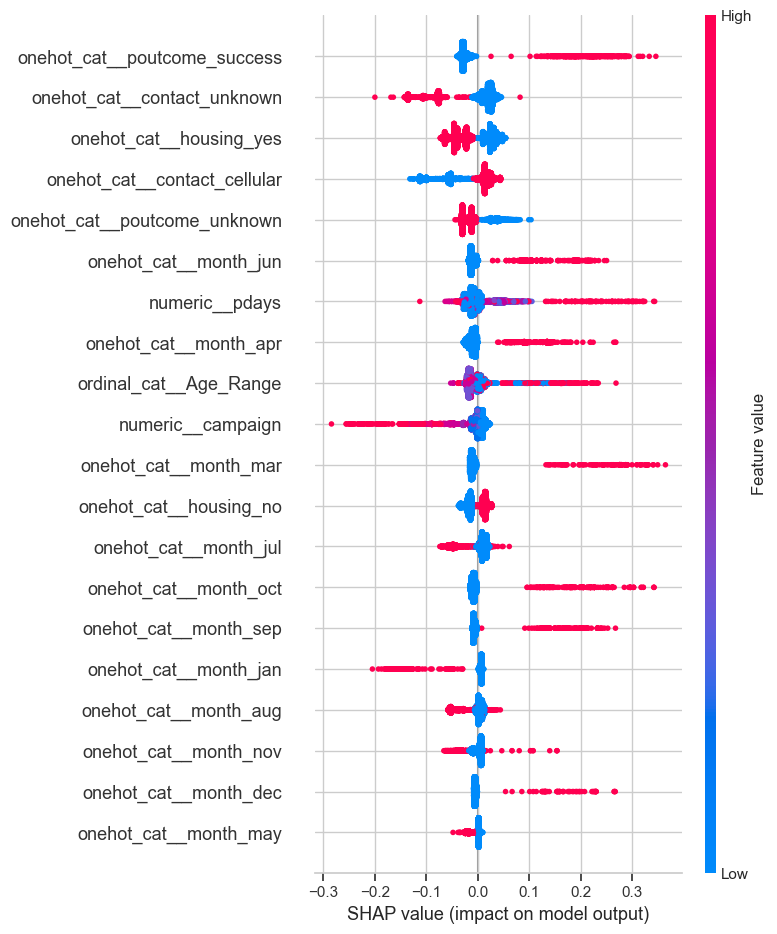

In [121]:
import shap

# 1. Ambil preprocessing dan model dari pipeline
preprocessor = best_model.named_steps['preprocess']
model = best_model.named_steps['model']

# 2. Transformasi data training
X_train_1 = preprocessor.fit_transform(X_train_filtered)
feature_names = preprocessor.get_feature_names_out()

# 3. Ubah ke array jika hasilnya sparse matrix
if hasattr(X_train_1, "toarray"):
    X_train_1 = X_train_1.toarray()

# 4. Inisialisasi SHAP TreeExplainer
explainer = shap.TreeExplainer(model, X_train_1, feature_perturbation="interventional", model_output="probability")

# 5. Hitung SHAP values
shap_values = explainer.shap_values(X_train_1)

# 6. Visualisasi SHAP summary plot
shap.summary_plot(shap_values, X_train_1, feature_names=feature_names)

**SHAP Analysis: Feature Impact on Term Deposit Subscription**

The SHAP summary plot illustrates how each feature contributes to the model’s prediction of whether a customer will subscribe to a term deposit. Red points indicate high feature values, and blue points indicate low values. SHAP values to the right push predictions toward "subscribe," while values to the left push them toward "not subscribe."

Top Feature Insights

1. `poutcome_success`: The most influential positive predictor. Customers who previously succeeded in a campaign are highly likely to subscribe again.
2. `contact_unknown`: When the contact method is unknown, customers are significantly less likely to subscribe (red dots pushing to the left).
3. `housing_yes`: Customers with housing loans are slightly more likely to subscribe, possibly reflecting stronger financial commitment or engagement.
4. `contact_cellular`: Being contacted via mobile phone correlates with higher subscription likelihood, especially when this channel is actively used (red points on the right).
5. `poutcome_unknown`: Customers with unknown past campaign outcomes tend to show a slight negative contribution to subscription probability.
6. `month_jun`: June appears to be an effective campaign month, showing a positive impact on subscription likelihood.
7. pdays: Shorter durations since the last contact (low values in red) are associated with increased likelihood of subscription, indicating better engagement.
8. `month_apr` and `month_mar`: These months show a modest positive impact, suggesting that campaign timing plays a role.
9. `age range`: Age continues to show a consistent but moderate effect; some age groups (likely older or more stable individuals) appear more responsive.
10. `campaign`: A higher number of contact attempts generally reduces the likelihood of subscription, possibly due to oversaturation or irritation.
11. `housing_no` and `loan_no`: Customers without housing or personal loans show minor, but mixed contributions—those without loans may have more financial flexibility, though the effect is not strongly directional.
12. Other months (e.g., May, December, November): These show little influence and cluster near zero on the SHAP value scale.

**Probability and Financial Analysis**

In [122]:
# grouping probability class
def probclass(x):
    if 0 <= x < 0.1 :
        return '0% - 10%'
    elif 0.1 <= x < 0.2 :
        return '10% - 20%'
    elif 0.2 <= x < 0.3 :
        return '20% - 30%'
    elif 0.3 <= x < 0.4 :
        return '30% - 40%'
    elif 0.4 <= x < 0.5 :
        return '40% - 50%'
    elif 0.5 <= x < 0.6 :
        return '50% - 60%'
    elif 0.6 <= x < 0.7 :
        return '60% - 70%'
    elif 0.7 <= x < 0.8 :
        return '70% - 80%'
    elif 0.8 <= x < 0.9 :
        return '80% - 90%'
    elif 0.9 <= x <= 1.0 :
        return '90% - 100%'

In [123]:
# Defining best model

best_model = grid_gradboostbusiness.best_estimator_
best_model.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['campaign', 'pdays']),
                                                 ('onehot_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['contact', 'housing',
                                                   'poutcome', 'month']),
                                                 ('ordinal_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Age_Range'])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.05, max_features=10,
                                            n_estimators=150, random_state=42,
                                            subsample=0.9))])

In [124]:
# retrieve y_pred and y_pred_proba data for the test set

y_pred_proba_gradboost = best_model.predict_proba(X_test)[:,-1]
y_pred_gradboost = best_model.predict(X_test)

In [125]:
# creating a new dataset and inserting the columns: y_pred_proba, class probability, y_pred, and y_actual

df_proba = X_test
df_proba['pred_proba'] = y_pred_proba_gradboost
df_proba['proba_class'] = df_proba['pred_proba'].apply(probclass)
df_proba['y_pred'] = y_pred_gradboost
df_proba['y_actual'] = y_test
df_proba['y_pred_1'] = df_proba['y_pred'].apply(lambda x : 1 if x == 1 else 0)
df_proba['y_pred_0'] = df_proba['y_pred'].apply(lambda x : 1 if x == 0 else 0)
df_proba['y_actual_1'] = df_proba['y_actual'].apply(lambda x : 1 if x == 1 else 0)
df_proba['y_actual_0'] = df_proba['y_actual'].apply(lambda x : 1 if x == 0 else 0)
df_proba

,Age_Range,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,balance_desc,pred_proba,proba_class,y_pred,y_actual,y_pred_1,y_pred_0,y_actual_1,y_actual_0
6143,35-44 (Established Adults),technician,287.0,yes,no,cellular,jul,3.0,-1.0,unknown,Positive,0.356478,30% - 40%,0,0,0,1,0,1
769,35-44 (Established Adults),technician,994.0,yes,no,cellular,may,5.0,-1.0,unknown,Positive,0.373889,30% - 40%,0,0,0,1,0,1
2813,25-34 (Emerging Affluents),blue-collar,-46.0,yes,no,cellular,mar,1.0,89.0,failure,Negative,0.807322,80% - 90%,1,1,1,0,1,0
4826,35-44 (Established Adults),services,0.0,yes,no,cellular,may,6.0,-1.0,unknown,Positive,0.339111,30% - 40%,0,1,0,1,1,0
3142,25-34 (Emerging Affluents),technician,510.0,yes,no,unknown,jun,15.0,-1.0,unknown,Positive,0.109208,10% - 20%,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7221,25-34 (Emerging Affluents),student,2354.0,no,no,cellular,feb,7.0,-1.0,unknown,Positive,0.432778,40% - 50%,0,1,0,1,1,0
4957,25-34 (Emerging Affluents),blue-collar,101.0,no,yes,cellular,jul,3.0,-1.0,unknown,Positive,0.506978,50% - 60%,1,1,1,0,1,0
7794,35-44 (Established Adults),management,465.0,yes,no,cellular,jul,1.0,-1.0,unknown,Positive,0.375365,30% - 40%,0,1,0,1,1,0
1397,25-34 (Emerging Affluents),admin,377.0,yes,no,unknown,jun,15.0,-1.0,unknown,Positive,0.109208,10% - 20%,0,1,0,1,1,0


In [126]:
# Retrieve the list of average predicted probabilities for each class
list_avg_pred_ptoba = df_proba[['proba_class','pred_proba']].groupby('proba_class').mean().values

In [127]:
# Creating a new DataFrame to analyze predicted probabilities and actual probabilities
df_proba_2 = df_proba[['proba_class','y_pred_1','y_pred_0','y_actual_1','y_actual_0']].groupby('proba_class',as_index=False).sum()
df_proba_2['proba_average_actual'] = df_proba_2['y_actual_1']*100/(df_proba_2['y_actual_0']+df_proba_2['y_actual_1'])
df_proba_2['proba_average_predict'] = list_avg_pred_ptoba*100
df_proba_2

,proba_class,y_pred_1,y_pred_0,y_actual_1,y_actual_0,proba_average_actual,proba_average_predict
0,0% - 10%,0,3,0,3,0.000000,9.394738
1,10% - 20%,0,44,11,33,25.000000,16.739176
2,20% - 30%,0,305,62,243,20.327869,23.283330
3,30% - 40%,0,294,97,197,32.993197,35.013599
4,40% - 50%,0,382,149,233,39.005236,44.360856
5,50% - 60%,125,0,72,53,57.600000,53.420646
6,60% - 70%,75,0,59,16,78.666667,65.057877
7,70% - 80%,121,0,106,15,87.603306,74.634360
8,80% - 90%,135,0,121,14,89.629630,84.474456
9,90% - 100%,77,0,69,8,89.610390,93.874180


**Insight :**

The model makes most of its positive predictions in the 50%–100% probability range. However, the 50%–60% bin has a high number of false positives (53 out of 125), which lowers precision. In contrast, higher bins (like 90%–100%) show much better precision with fewer false positives. Since our main goal is to improve precision, raising the classification threshold would reduce incorrect positive predictions and make the model’s “yes” predictions more reliable.

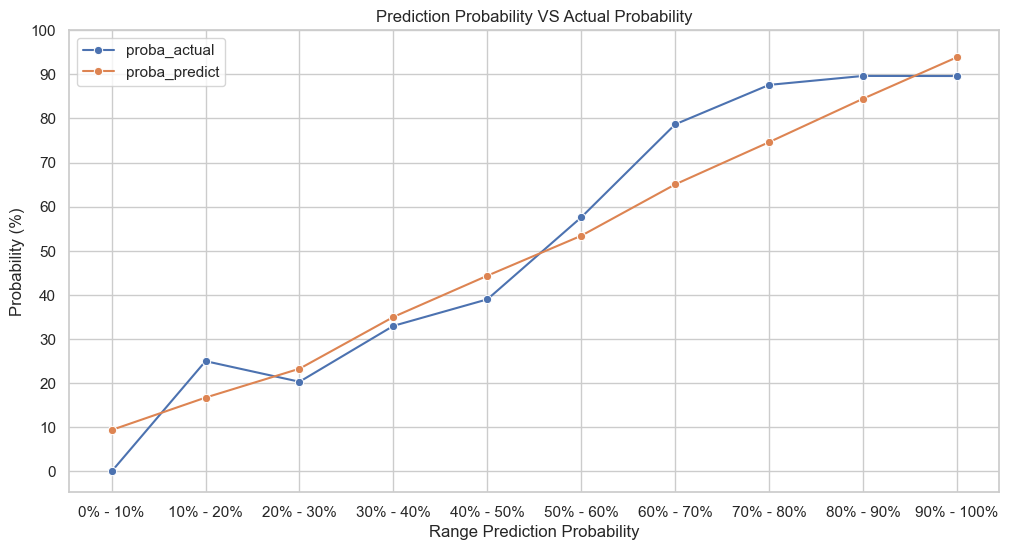

In [128]:
# Melakukan Visualisasi
plt.figure(figsize=(12,6))
plt.title('Prediction Probability VS Actual Probability')
sns.lineplot(data=df_proba_2, x = 'proba_class', y = 'proba_average_actual',marker='o',errorbar=None)
sns.lineplot(data=df_proba_2, x = 'proba_class', y = 'proba_average_predict',marker='o')
plt.legend(['proba_actual','proba_predict'])
plt.xlabel('Range Prediction Probability')
plt.yticks(ticks=np.arange(0,110,10))
plt.ylabel('Probability (%)')
plt.show()

**Insight :**

The graph shows that predicted probabilities and actual outcomes increase in the same direction, reflecting good calibration overall. For example, in the 90%–100% range, the model predicts an average probability of 93.87%, while the actual outcome is slightly lower at 89.61%. Similarly, in the 50%–60% range, the model predicts 53.42%, with an actual result of 57.6%. These small gaps indicate slight over- or underestimation, but the overall trend remains consistent, showing the model's confidence is largely aligned with reality. However, if we look at the accuracy, we obtain the following results:

In [129]:
# Mencari prediction accuracy untuk setiap kelas probabilistik
list_accuracy = []
for i in ['0% - 10%','10% - 20%','20% - 30%','30% - 40%','40% - 50%','50% - 60%','60% - 70%','70% - 80%','80% - 90%','90% - 100%'] :
    df_proba1 = df_proba[df_proba['proba_class'] == i]
    df_proba1['accuracy'] = np.where(df_proba1['y_pred']==df_proba1['y_actual'],1,0)
    accuracy = df_proba1['accuracy'].sum() * 100/ len(df_proba1) 
    list_accuracy.append(accuracy)

In [130]:
# Menyimpannya dalam dataframe
df_distributed_proba = pd.DataFrame({
    'Range Probability' : ['0% - 10%','10% - 20%','20% - 30%','30% - 40%','40% - 50%','50% - 60%','60% - 70%','70% - 80%','80% - 90%','90% - 100%'],
    'Prediction Accuracy (%)' : list_accuracy
})
df_distributed_proba

,Range Probability,Prediction Accuracy (%)
0,0% - 10%,100.000000
1,10% - 20%,75.000000
2,20% - 30%,79.672131
3,30% - 40%,67.006803
4,40% - 50%,60.994764
5,50% - 60%,57.600000
6,60% - 70%,78.666667
7,70% - 80%,87.603306
8,80% - 90%,89.629630
9,90% - 100%,89.610390


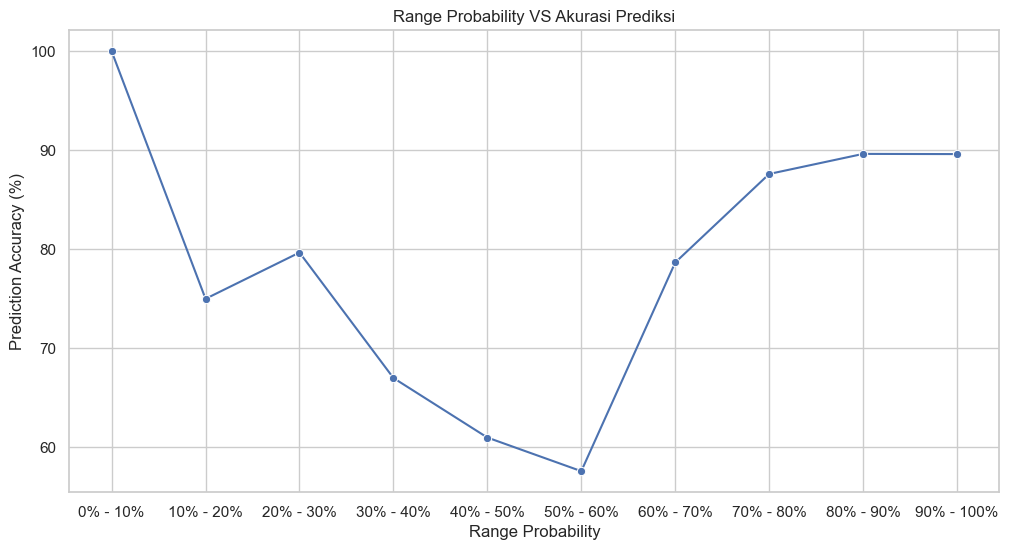

In [131]:
# Melakukan Visualisasi
plt.figure(figsize=(12,6))
plt.title('Range Probability VS Akurasi Prediksi')
sns.lineplot(data=df_distributed_proba, x = 'Range Probability', y = 'Prediction Accuracy (%)',marker='o')
plt.show()

**Analisis Proba Class VS Akurasi Prediksi :**

The chart shows that the model performs best in the 0%–10% probability range, achieving 100% accuracy, indicating that very low-confidence predictions (predicting “no”) are highly reliable. However, as the predicted probability increases, especially in the 30%–60% range, accuracy drops significantly. The lowest point is in the 50%–60% range, where accuracy falls to just 57%, suggesting that the model struggles the most in this mid-confidence zone where the distinction between classes becomes more ambiguous.

Beyond this point, accuracy rises steadily, reaching around 90% in the 80%–100% range, showing that high-probability predictions (predicting “yes”) are also quite reliable.

Since the dataset is balanced, this pattern likely reflects the model’s inherent uncertainty around the decision boundary, rather than any bias caused by class distribution. Overall, the model performs very well in extreme probability ranges, but could benefit from further tuning in the mid-probability zone to improve stability and confidence.

# **Conclusion**

**Summary of Findings Based on Machine Learning Modeling Results**

Based on the analysis and machine learning modeling, the following key conclusions were drawn:

1. Our experiment shows that retaining the `poutcome` feature leads to better model performance. The average precision score of the top 5 models improved by 2.94% when `poutcome` was included, with the most significant gain observed in the LGBM model (+6.04%). Despite its ambiguity, `poutcome`—even with many "unknown" values—captures meaningful patterns that enhance precision and help reduce unnecessary marketing costs.

2. The models selected for hyperparameter tuning were the top 4 performers, based on both cross-validation scores on the training set and prediction results on the test set. These models include LGBM, XGBoost, Gradient Boosting, and Stacking—all of which consistently demonstrated strong performance, particularly in terms of precision.

3. Although LGBM showed better precision score performance compared to other models, it was not selected as the analysis model because its performance peaked only during the training phase (0.91, 0.75). The model demonstrated significant overfitting. Therefore, the Gradient Boosting model was chosen for analysis due to its more balanced performance (0.76, 0.75) (before tuning) and 0.80, 0.81 (after tuning using Grid Search and model-based feature selection).

4. Hyperparameter tuning improved the performance of the Gradient Boosting model, with its precision increasing from 0.77, 0.74 (Training Phase) before tuning to 0.80, 0.81 (Testing Phase) after tuning (using Grid Search and model-based feature selection). The optimal hyperparameters identified were: `model__subsample`: 0.9, `model__n_estimators`: 150, `model__max_depth`: 3, `model__learning_rate`: 0.05.

5. The eight most influential features in the model were: `age` (transformed into `age_range` through feature engineering), `poutcome, loan, housing, pdays, campaign, month`, and `contact`. In this model, the features `job, balance`, and `loan` were removed due to their low influence on the model—removing them even improved the model's performance.

**Feature Information Table**

| **Feature**     | **Data Type** | **Limitations / Notes**                                                                 |
|------------------|---------------|------------------------------------------------------------------------------------------|
| `age`            | Integer       | Customer age ranges from 18 to 95.                                                      |
| `balance`        | Integer       | Account balance ranges from -6,847 to 66,653. Negative values indicate debt.            |
| `job`            | String        | Includes 12 occupation types such as admin, technician, services, etc.                  |
| `housing`        | String        | Values: `yes`, `no`, `unknown` — indicates housing loan ownership.                      |
| `loan`           | String        | Values: `yes`, `no`, `unknown` — indicates personal loan ownership.                     |
| `contact`        | String        | Values: `telephone`, `cellular` — method of last customer contact.                      |
| `month`          | String        | Campaign months include: `may`, `jun`, `jul`, `aug`, `oct`, `nov`, `dec`, `mar`, `apr`, `sep`. |
| `campaign`       | Integer       | Number of contacts during the current campaign ranges from 1 to 63.                     |
| `pdays`          | Integer       | Days since last contact in a previous campaign (0–854 or -1 if never contacted).        |
| `poutcome`       | String        | Previous campaign outcome: `success`, `failure`, `unknown`.                             |
| `deposit`        | Binary (0/1)  | Target variable: `1` if the client subscribed to a term deposit, `0` otherwise.         |

**Model Limitations**

- Ambiguous Feature Values: Features like `poutcome`, `housing`, and `loan` include `unknown` values, which introduce uncertainty. However, experiments show that preserving them as categories contributes positively to model performance.
- Temporal Bias: Features like `month` and `pdays` are time-sensitive and may reflect seasonal or campaign timing effects. The model’s effectiveness could vary if applied to different periods or future data.
- Model Interpretability: While ensemble models (e.g., LGBM, XGBoost) yield high precision, they may sacrifice transparency compared to simpler models. Tools like SHAP were used to explain feature influence.

In [132]:
df_model['deposit'].value_counts(normalize=True)

deposit
0    0.522101
1    0.477899
Name: proportion, dtype: float64

# **Recommendation**

**Recommendation from EDA**

Based on all the analyses conducted, the following recommendations are proposed to help increase the conversion rate, which will directly enhance the company’s profit:

- Increase outreach efforts to customers who are underproductive (ages 18–24) or post-productive (over 65 years old), as well as those whose occupation is listed as "Student" or "Retired".
- Try to contact all customers via mobile phone (cellular) instead of using a landline.
- Prioritize contacting customers who do not have loan (either common loan or housing loan) cause they tend to decide to subsribe to the deposit.
- Avoid calling the same customer more than 20 times, as it becomes ineffective beyond that point.
- Focus more on contacting individuals who were successful in previous campaigns, as they are significantly more likely to convert.

**Recommendation from Modelling**

Based on the modeling that has been conducted, the following recommendations are proposed to improve model performance and enhance company profitability:

1. It is recommended to develop a machine learning model for multiclass classification in the future, where customers can be grouped based on their interest in various investment instruments besides term deposits (e.g., mutual funds, bonds, etc.). This approach is expected to increase company profit, as alternative investment instruments tend to generate higher returns for the bank.

2. Consider excluding the `job, balance`, and `loan` features if the data for these variables is difficult to obtain. These features were found to have minimal impact on the model, and their removal actually improved the model's precision from 0.76 to 0.80. Eliminating them can streamline the data collection process during deployment while enhancing overall model performance.

3. To further enhance model performance, the following actions are suggested:
- Apply ordinal encoding or binary encoding to certain categorical columns instead of one-hot encoding, to explore potential improvements in model efficiency.
- Include new features such as customer tier classification (e.g., priority vs. regular customers), which may contribute to better predictive power.

# **Save Model**

In [133]:
import pickle

In [134]:
final_model.fit(X,y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['campaign', 'pdays']),
                                                 ('onehot_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['housing', 'loan', 'contact',
                                                   'job', 'poutcome', 'month',
                                                   'balance_desc']),
                                                 ('ordinal_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Age_Range'])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.08, max_depth=4,
                                            max_features=6, random_state=42,
                                            subsample=0.9))])

In [135]:
pickle.dump(final_model, open('final_model_for_Bank_Campaign_Final_Project.sav','wb'))

In [136]:
model_loaded = pickle.load(open('final_model_for_Bank_Campaign_Final_Project.sav','rb'))